# The Problem Statement

This Notebook shows quite an Exhaustive Approach to **"Exploratory Data Analysis"** for a consumer finance company which specialises in lending various types of loans to urban customers

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

 - The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in the sample,

 - All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

 - Approved: The Company has approved loan Application
 - Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received bad pricing which he did not want.
 - Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
 - Unused offer: Loan has been cancelled by the client but on different stages of the process.

**Here EDA is done to understand how consumer attributes and loan attributes that influence the tendency of default.**

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', None)
pd.set_option('float_format','{:f}'.format)

## Step 1: Reading and Inspection

-  ### Import and read

Import and read the Loan Application database. Store it in a variable called `loan_app`.

In [3]:
loan_app = pd.read_csv('../data/application_data.csv')

Import and read the Previous Loan application database and store it in a variable called `prev_app`

In [4]:
prev_app = pd.read_csv('../data/previous_application.csv')

- ### Inspect the Current Application Data


In [5]:
# Check the number of rows and columns
loan_app.shape

(307511, 122)

In [6]:
# Get the names of all the columns
loan_app.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [7]:
# Get the count of data types of columns
loan_app.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
loan_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# Inspect the top 5 rows
loan_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_ANNUITY  \
0               Y             0     202500.000000  406597.500000 24700.500000   
1               N             0     270000.000000 1293502.500000 35698.500000   
2               Y             0      67500.000000  135000.000000  6750.000000   
3               Y             0     135000.000000  312682.500000 29686.500000   
4               Y             0     121500.000000  513000.000000 21865.500000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0    351000.000000   Unaccompanied          Working   
1   1129500.000000          Family    State servant   
2    135000.000000   Unaccompanied          Working   
3    297000.000000   Unaccompanied          Working   
4    513000.000000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637       -3648.000000   
1                    0.003541      -16765          -1188       -1186.000000   
2                    0.010032      -19046           -225       -4260.000000   
3                    0.008019      -19005          -3039       -9833.000000   
4                    0.028663      -19932          -3038       -4311.000000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          nan           1               1                0   
1             -291          nan           1               1                0   
2            -2531    26.000000           1               1                1   
3            -2437          nan           1               1                0   
4            -3458          nan           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers         1.000000   
1                 1           1           0      Core staff         2.000000   
2                 1           1           0        Laborers         1.000000   
3                 1           0           0        Laborers         2.000000   
4                 1           0           0      Core staff         1.000000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2      

In [10]:
# Get a feel for the numerical columns - How they are doing? - at a high level.
# Since the number of columns is large, you do not get to see all the numerical columns at this stage
loan_app.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count 307511.000000 307511.000000 307511.000000     307511.000000   
mean  278180.518577      0.080729      0.417052     168797.919297   
std   102790.175348      0.272419      0.722121     237123.146279   
min   100002.000000      0.000000      0.000000      25650.000000   
25%   189145.500000      0.000000      0.000000     112500.000000   
50%   278202.000000      0.000000      0.000000     147150.000000   
75%   367142.500000      0.000000      1.000000     202500.000000   
max   456255.000000      1.000000     19.000000  117000000.000000   

          AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
count  307511.000000 307499.000000    307233.000000   
mean   599025.999706  27108.573909    538396.207429   
std    402490.776996  14493.737315    369446.460540   
min     45000.000000   1615.500000     40500.000000   
25%    270000.000000  16524.000000    238500.000000   
50%    513531.000000  24903.000000    450000.000000   
75%    808650.000000  34596.000000    679500.000000   
max   4050000.000000 258025.500000   4050000.000000   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000 307511.000000  307511.000000   
mean                     0.020868 -16036.995067   63815.045904   
std                      0.013831   4363.988632  141275.766519   
min                      0.000290 -25229.000000  -17912.000000   
25%                      0.010006 -19682.000000   -2760.000000   
50%                      0.018850 -15750.000000   -1213.000000   
75%                      0.028663 -12413.000000    -289.000000   
max                      0.072508  -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE    FLAG_MOBIL  \
count      307511.000000    307511.000000 104582.000000 307511.000000   
mean        -4986.120328     -2994.202373     12.061091      0.999997   
std          3522.886321      1509.450419     11.944812      0.001803   
min        -24672.000000     -7197.000000      0.000000      0.000000   
25%         -7479.500000     -4299.000000      5.000000      1.000000   
50%         -4504.000000     -3254.000000      9.000000      1.000000   
75%         -2010.000000     -1720.000000     15.000000      1.000000   
max             0.000000         0.000000     91.000000      1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000 307511.000000   
mean         0.819889         0.199368          0.998133      0.281066   
std          0.384280         0.399526          0.043164      0.449521   
min          0.000000         0.000000          0.000000      0.000000   
25%          1.000000         0.000000          1.000000      0.000000   
50%          1.000000         0.000000          1.000000      0.000000   
75%          1.000000         0.000000          1.000000      1.000000   
max          1.000000         1.000000          1.000000      1.000000   

         FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count 307511.000000    307509.000000         307511.000000   
mean       0.056720         2.152665              2.052463   
std        0.231307         0.910682              0.509034   
min        0.000000         1.000000              1.000000   
25%        0.000000         2.000000              2.000000   
50%        0.000000         2.000000              2.000000   
75%        0.000000         3.000000              2.000000   
max        1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       2.000000

- This shows that there are 106 numerical columns.
- Some are normalized with the max value being 1
- Most of them have a reasonable amount of data as the count variable shows. However, null value percetanges will be dealt with separately later
- Some seem to have very high standard deviation and hence need further inspection on any anomolies e.g. DAYS_EMPLOYED
- Some seem to have a huge gap between the 75% and max. Needs to be explored further - E.g. AMT_INCOME_TOTAL

### -   Inspect the Previous Application data 

In [11]:
# Get the number of rows and columns
prev_app.shape

(1670214, 37)

In [12]:
# Get. the names of all the columns
prev_app.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [13]:
# Get the counts of different types of data
prev_app.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [14]:
# Inspect the top 5 rows of data
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans  1730.430000     17145.000000   
1     2802425      108129         Cash loans 25188.615000    607500.000000   
2     2523466      122040         Cash loans 15060.735000    112500.000000   
3     2819243      176158         Cash loans 47041.335000    450000.000000   
4     1784265      202054         Cash loans 31924.395000    337500.000000   

     AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.000000          0.000000     17145.000000                   SATURDAY   
1 679671.000000               nan    607500.000000                   THURSDAY   
2 136444.500000               nan    112500.000000                    TUESDAY   
3 470790.000000               nan    450000.000000                     MONDAY   
4 404055.000000               nan    337500.000000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1           0.000000               0.182832   
1                       1                nan                    nan   
2                       1                nan                    nan   
3                       1                nan                    nan   
4                       1                nan                    nan   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       nan                    XNA             Approved   
2                       nan                    XNA             Approved   
3                       nan                    XNA             Approved   
4                       nan                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0    12.000000           middle  POS mobile with interest       365243.000000   
1    36.000000       low_action          Cash X-Sell: low       365243.000000   
2    12.000000             high         Cash X-Sell: high       365243.000000   
3    12.000000           middle       Cash X-Sell: middle       365243.000000   
4    24.000000             high         Cash Street: high                 

In [15]:
# Inspect the numerical columns and their metrics
prev_app.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count 1670214.000000 1670214.000000 1297979.000000   1670214.000000   
mean  1923089.135331  278357.174099   15955.120659    175233.860360   
std    532597.958696  102814.823849   14782.137335    292779.762387   
min   1000001.000000  100001.000000       0.000000         0.000000   
25%   1461857.250000  189329.000000    6321.780000     18720.000000   
50%   1923110.500000  278714.500000   11250.000000     71046.000000   
75%   2384279.750000  367514.000000   20658.420000    180360.000000   
max   2845382.000000  456255.000000  418058.145000   6905160.000000   

          AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count 1670213.000000     774370.000000   1284699.000000   
mean   196114.021218       6697.402139    227847.279283   
std    318574.616546      20921.495410    315396.557937   
min         0.000000         -0.900000         0.000000   
25%     24160.500000          0.000000     50841.000000   
50%     80541.000000       1638.000000    112320.000000   
75%    216418.500000       7740.000000    234000.000000   
max   6905160.000000    3060045.000000   6905160.000000   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count           1670214.000000          1670214.000000      774370.000000   
mean                 12.484182                0.996468           0.079637   
std                   3.334028                0.059330           0.107823   
min                   0.000000                0.000000          -0.000015   
25%                  10.000000                1.000000           0.000000   
50%                  12.000000                1.000000           0.051605   
75%                  15.000000                1.000000           0.108909   
max                  23.000000                1.000000           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000 1670214.000000   
mean                0.188357                  0.773503    -880.679668   
std                 0.087671                  0.100879     779.099667   
min                 0.034781                  0.373150   -2922.000000   
25%                 0.160716                  0.715645   -1300.000000   
50%                 0.189122                  0.835095    -581.000000   
75%                 0.193330                  0.852537    -280.000000   
max                 1.000000                  1.000000      -1.000000   

       SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count    1670214.000000 1297984.000000       997149.000000   997149.000000   
mean         313.951115      16.054082       342209.855039    13826.269337   
std         7127.443459      14.567288        88916.115834    72444.869708   
min           -1.000000       0.000000        -2922.000000    -2892.000000   
25%           -1.000000       6.000000       365243.000000    -1628.000000   
50%            3.000000      12.000000       365243.000000     -831.000000   
75%           82.000000      24.000000       365243.000000     -411.000000   
max      4000000.000000      84.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                  

- 21 out od 37 columns are numerical
- SK_ID_CURR is the foreign key to the application data
- While there are 1.67 million rows of data, there are lot of data with 9 lakh rows and hence they need to be probed for missing data and thier importance and hence imputation / treatment of missing values
- certain columns have a huge percent of missing data e.g RATE_INTEREST_PRIVILEGED

### Conclusion at this stage:

- The number of columns in the current application is large - 122 columns. Hence, need to see the relevance of all the data for the analysis w.r.t. the `Target` variable. Need to either
    - Fix the missings values
    - Remove them
    - Replace them with NaNs
    

### Checking for Continuous and Categorical variables

In [16]:
loan_app.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [17]:
prev_app.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
RATE_INTEREST_PRIMARY              148
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE            

## Step 2:  Cleaning the Data
###  - Inspect for Missing Values - Current Application Data

In [18]:
# Check the null values 60 columns at a time as all columns cannot be analysed at one go
(loan_app.isnull().sum()/len(loan_app.index))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

### Drop Columns 
#### - with high percentage of NULL Values

In [19]:
# All the columns that give AVG, MEDIAN, MODE about the Apartment size of the customer 
# have more than 45% of missing values. They also Hence they will be removed, as practically, 
# I would not be able to impute so many values meaningfully.
loan_app = loan_app.drop(loan_app.columns.to_series()['APARTMENTS_AVG': 'EMERGENCYSTATE_MODE'], axis=1)
loan_app.shape

(307511, 75)

In [20]:
# Dropping own car age as well - since it has 65% null values
loan_app.drop('OWN_CAR_AGE', axis=1, inplace=True)


#### - Dropping More Columns that do not mean much to the analysis

In [21]:
# Dropping all the documents flag columns as they so not contribute much to analysis
loan_app.drop(loan_app.columns.to_series()['FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'], axis=1, inplace=True)

In [22]:
loan_app.shape

(307511, 54)

In [23]:
# Dropping a few more variables that may not have too much of a correlation with the Target variable
# hypothetically, based on domain knowledge
loan_app = loan_app.drop(['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'], axis=1)

In [24]:
loan_app.shape

(307511, 51)

In [25]:
#Dropping a few more FLAG columns as they generally do not lead to too much insight
loan_app.drop(loan_app.columns.to_series()['FLAG_MOBIL':'FLAG_EMAIL'], axis=1, inplace=True)

In [26]:
loan_app.shape

(307511, 45)

In [27]:
# After progressing a lot with the analysis, I realised that either this information is very much embedded 
# in other similar columns or still have high percentage of nulls. Hence dropped them as an after thought
loan_app.drop(['REGION_RATING_CLIENT','EXT_SOURCE_1','REG_CITY_NOT_LIVE_CITY',
                                           'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                                           'LIVE_REGION_NOT_WORK_REGION'], axis = 1, inplace = True)


### Treat Missing Values 
 - Check if any treatment can be done for columns with 15% or less missing values

#### Can they be imputed? If yes, with what values?

In [28]:
# All the credit bureau columns have 13.5% null values. Let us examine them to see if we can impute values for them

loan_app['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count   265992.000000
mean         0.006402
std          0.083849
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [29]:
loan_app.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.000000    264366
1.000000      1560
2.000000        56
3.000000         9
4.000000         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [30]:
loan_app.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)

0.000000   0.993887
1.000000   0.005865
2.000000   0.000211
3.000000   0.000034
4.000000   0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

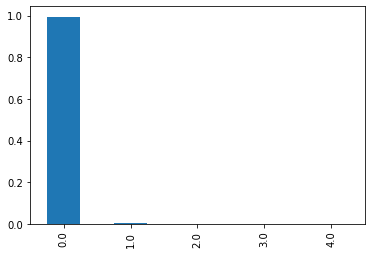

In [31]:
loan_app.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True).plot.bar()
plt.show()

In [32]:
# Check for mode and median
print(loan_app.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(loan_app.AMT_REQ_CREDIT_BUREAU_HOUR.median())

0   0.000000
dtype: float64
0.0


In [33]:
# Similarly let us check the other credit bureau columns
loan_app.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)

0.000000   0.994402
1.000000   0.004857
2.000000   0.000399
3.000000   0.000169
4.000000   0.000098
5.000000   0.000034
6.000000   0.000030
9.000000   0.000008
8.000000   0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

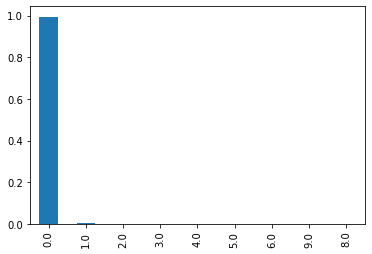

In [34]:
loan_app.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True).plot.bar()
plt.show()

In [35]:
# Check for mode and median
print(loan_app.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print(loan_app.AMT_REQ_CREDIT_BUREAU_DAY.median())

0   0.000000
dtype: float64
0.0


In [36]:
loan_app.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)

0.000000   0.967909
1.000000   0.030858
2.000000   0.000748
3.000000   0.000218
4.000000   0.000128
6.000000   0.000075
5.000000   0.000038
8.000000   0.000019
7.000000   0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

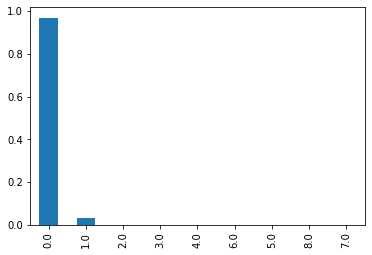

In [37]:
loan_app.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True).plot.bar()
plt.show()

In [38]:
# Check for mode and median
print(loan_app.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
print(loan_app.AMT_REQ_CREDIT_BUREAU_WEEK.median())


0   0.000000
dtype: float64
0.0


#### 3 Variables with an Impute Value are:
**Conclusion**: Since 99% of the values are 0, meaning the mode and the median are 0.0, the missing 13.5% can also be imputed to 0 for all the above three columns - AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK.

However similar columns explaining how many eunquiries were made in the last month, quarter and year have a little wider spread of the values, though still skewed. 

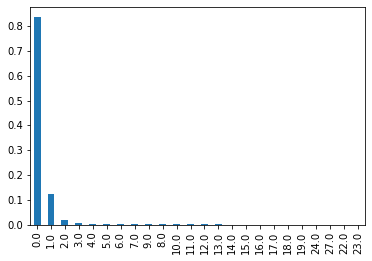

In [39]:
loan_app.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True).plot.bar()
plt.show()

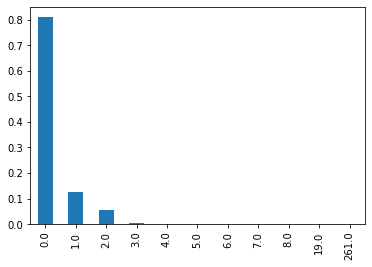

In [40]:
loan_app.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True).plot.bar()
plt.show()

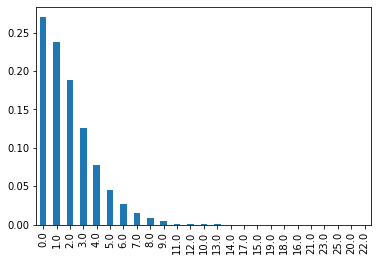

In [41]:
loan_app.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True).plot.bar()
plt.show()

**Conclusion:** Better not to impute the values for these three variables and bring in any form of bias. Prefer to work with the missing values itself

### Analyse More  NULL Columns and check Imputing strategy

In [42]:
# Occupation type has 31.34% nulls. Let us examine that to see if we can impute those values reasonably
loan_app['OCCUPATION_TYPE'].isnull().sum()

96391

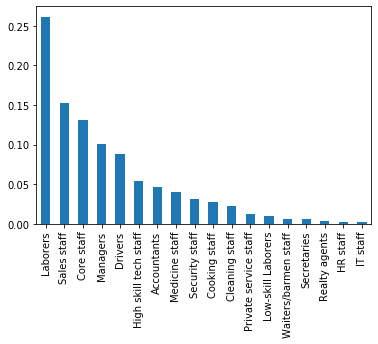

In [43]:
# Univariate analysis of OCCUPATION_TYPE
loan_app['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.show()

#### Conclusion: Do Not Impute
- 93391 values are missing but cannot be extrapolated as there is no distinctly large type that can be easily used


In [44]:
# Check once again the columns with missing values
(loan_app.isnull().sum()/len(loan_app.index))*100  

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT_W_CITY    0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000


In [45]:
# Amount_goods_Price seems to have some null values. Let us see how to treat the same?
loan_app.AMT_GOODS_PRICE.describe()

count    307233.000000
mean     538396.207429
std      369446.460540
min       40500.000000
25%      238500.000000
50%      450000.000000
75%      679500.000000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

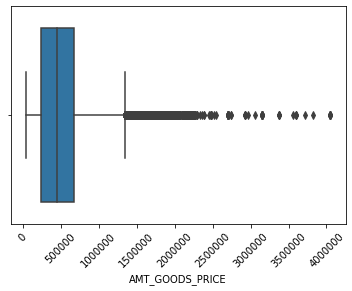

In [46]:
sns.boxplot(loan_app['AMT_GOODS_PRICE'].dropna())
plt.xticks(rotation=45)
plt.show()

In [47]:
loan_app.AMT_GOODS_PRICE.quantile([0.5,0.75, 0.85,0.95,1])

0.500000    450000.000000
0.750000    679500.000000
0.850000    900000.000000
0.950000   1305000.000000
1.000000   4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [48]:
loan_app.AMT_GOODS_PRICE.median()

450000.0

In [49]:
loan_app.AMT_GOODS_PRICE.mean()

538396.2074288895

#### Imputing Strategy for 4th Variable
**Conclusion:** Since there is a 4 to 5 times jump from the 85th percentile to the 100th percentile, there are  clealy outliers that could skew the data if we take a mean to impute the missing values. Hence will take a median to impute the missing values.

You can see that the mean gets pushed up by 13 lakhs as the data is skewed. Hence I would suggest an imputation with 450000.0 for the missing values i.e. the Median

In [50]:
# let us examine AMT_ANNUITY
loan_app.AMT_ANNUITY.describe()

count   307499.000000
mean     27108.573909
std      14493.737315
min       1615.500000
25%      16524.000000
50%      24903.000000
75%      34596.000000
max     258025.500000
Name: AMT_ANNUITY, dtype: float64

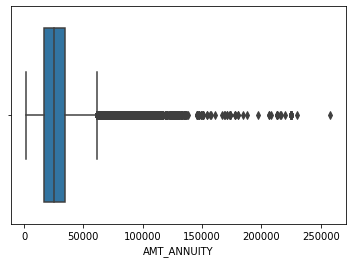

In [51]:
# Again I see a huge jump between the 75 percentile and the max. Let us plot and analyse further:
sns.boxplot(loan_app['AMT_ANNUITY'])

Inference: There are not few outlier but seems to have a long tail after the 100th percentile. Need to analyse it further using distplot

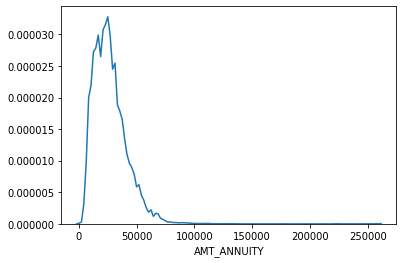

In [52]:
sns.distplot(loan_app['AMT_ANNUITY'].dropna(), hist=False)

In [53]:
loan_app['AMT_ANNUITY'].mean()

27108.573909183444

In [54]:
loan_app['AMT_ANNUITY'].median()

24903.0

#### Imputing Strategy for 5th Variable
**Conclusion:** having seen that there is a long tail and most of the data is probably below 70000, I would propose taking a median of the data to impute. Hence would impute with 24903

In [55]:
# OBS_30_CNT_SOCIAL_CIRCLE has missing values. Let us see how to treat it
loan_app.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count   306490.000000
mean         1.422245
std          2.400989
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

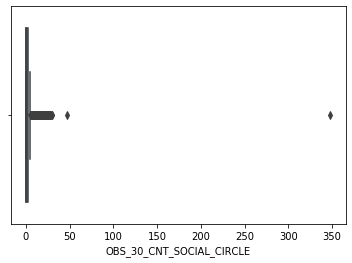

In [56]:
# seems to have outliers as the gap between 75 percentile and max is too huge

sns.boxplot(loan_app.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [57]:
loan_app.OBS_30_CNT_SOCIAL_CIRCLE.quantile([.75,.85,.95,1.0])

0.750000     2.000000
0.850000     3.000000
0.950000     6.000000
1.000000   348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

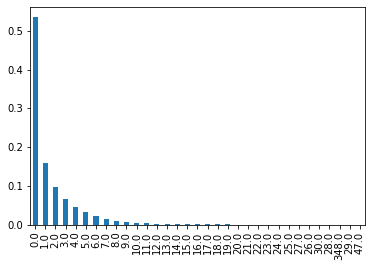

In [58]:
loan_app.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True).plot.bar()
plt.show()

In [59]:
# Since we have an outlier 348, it would be better to impute the values with the median
loan_app.OBS_30_CNT_SOCIAL_CIRCLE.median()

0.0

**Conclusion:** Since we have one large outlier 348, we could drop that value and take the mean as well. However the percentage of the missing values if very small and there are more than 53% of 0s and hence we take the median value 0 as the imputed value for the missing values

In [60]:
loan_app.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)

0.000000    0.885262
1.000000    0.092427
2.000000    0.017368
3.000000    0.003889
4.000000    0.000825
5.000000    0.000183
6.000000    0.000036
7.000000    0.000003
8.000000    0.000003
34.000000   0.000003
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

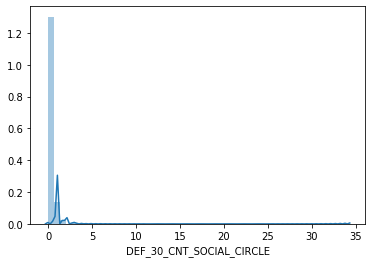

In [63]:
sns.distplot(loan_app.DEF_30_CNT_SOCIAL_CIRCLE,kde_kws={'bw':0.1})
plt.show()

In [64]:
loan_app.DEF_30_CNT_SOCIAL_CIRCLE.median()

0.0

**Conclusion:** Even this value loan_app.DEF_30_CNT_SOCIAL_CIRCLE could be imputed to 0.0

##  Step 3:  Check Data Types

In [65]:
loan_app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT_W_CITY      int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
ORGANIZATION_TYPE        

In [66]:
loan_app.DAYS_REGISTRATION.describe()

count   307511.000000
mean     -4986.120328
std       3522.886321
min     -24672.000000
25%      -7479.500000
50%      -4504.000000
75%      -2010.000000
max          0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [67]:
# Days_registration seesm to be having only integers and hence data type can be changed to int
loan_app.DAYS_REGISTRATION = loan_app.DAYS_REGISTRATION.astype('int')

## Step 4: Check for Outliers and treat them

### Outlier 1 and its treatment

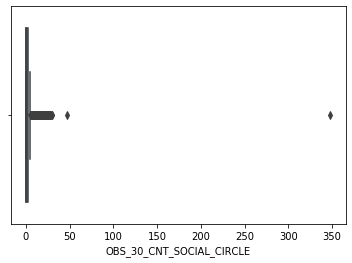

In [68]:
sns.boxplot(loan_app.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

#### Treatment for Outlier 1:  OBS_30_CNT_SOCIAL_CIRCLE
- Drop the outlier

In [69]:
# Remove that one outlier
loan_app.drop(loan_app[loan_app['OBS_30_CNT_SOCIAL_CIRCLE'] >50].index, inplace = True) 


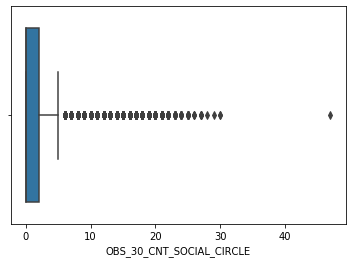

In [70]:
#plot again after removing the outlier
sns.boxplot(loan_app.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

### Outlier 2 and its treatment

In [71]:
# Similary inspect DAYS_EMPLOYED
loan_app.DAYS_EMPLOYED.describe()

count   307510.000000
mean     63815.259660
std     141275.946501
min     -17912.000000
25%      -2760.000000
50%      -1213.000000
75%       -289.000000
max     365243.000000
Name: DAYS_EMPLOYED, dtype: float64

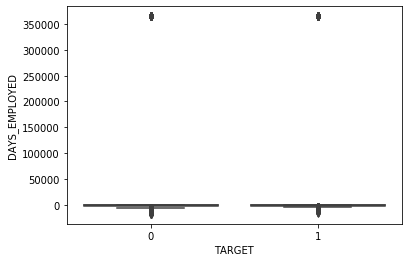

In [72]:
# Something seems amiss here. While all the values till 75th percentile are negative, 
# the max value is a very huge postiive number. Need to check the outliers here

sns.boxplot(x="TARGET", y="DAYS_EMPLOYED", data=loan_app)
plt.show()

# Will check the quartiles upto which it is negative


In [73]:
loan_app.DAYS_EMPLOYED.quantile([.5,.75,.8, .85,.9,.99])

0.500000    -1213.000000
0.750000     -289.000000
0.800000     -144.000000
0.850000   365243.000000
0.900000   365243.000000
0.990000   365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [74]:
sum(loan_app.DAYS_EMPLOYED == 365243.0)

55374

In [75]:
# clearly 365243.000000 seems to be an outlier. while all other data seems to be in the negative range.
365243.000000/365.25

999.98083504449

#### Treatment for Outlier 2: DAYS_EMPLOYED
- Convert the only large positive to a NaN as it was meant to be stored as 999 - a default for 'Not Available'

In [76]:
# This seems like a default value where the DAYS_EMPLOYED was probably not available. Hence we will convert this to 
# NaN
loan_app.loc[loan_app['DAYS_EMPLOYED'] == 365243.0,"DAYS_EMPLOYED"] = np.NaN

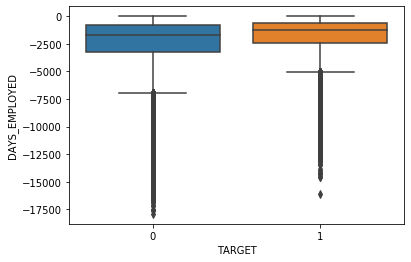

In [77]:
# The data is far cleaner after the outlier is treated
sns.boxplot(x="TARGET", y="DAYS_EMPLOYED", data=loan_app)
plt.show()

In [78]:
loan_app.DAYS_EMPLOYED.describe()

count   252136.000000
mean     -2384.171177
std       2338.364614
min     -17912.000000
25%      -3175.000000
50%      -1648.000000
75%       -767.000000
max          0.000000
Name: DAYS_EMPLOYED, dtype: float64

Now the DAYS_employed outlier is corrected and the column seems to have right data

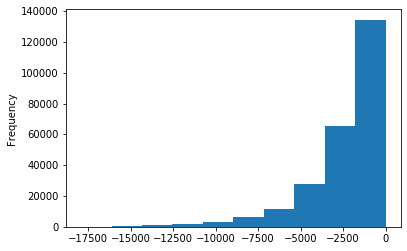

In [79]:
loan_app.DAYS_EMPLOYED.plot.hist()
plt.show()

### Outlier 3 and its treatment

In [80]:
loan_app.AMT_INCOME_TOTAL.describe()

count      307510.000000
mean       168797.809700
std        237123.524045
min         25650.000000
25%        112500.000000
50%        147150.000000
75%        202500.000000
max     117000000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

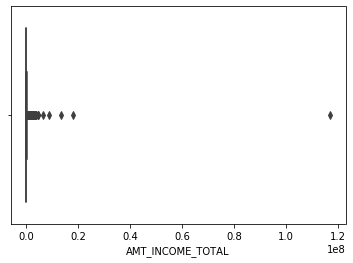

In [81]:
sns.boxplot(loan_app.AMT_INCOME_TOTAL)
plt.show()

In [82]:
loan_app.AMT_INCOME_TOTAL.quantile([0.8,0.85,0.9,0.95,0.99,1.0])

0.800000      225000.000000
0.850000      234000.000000
0.900000      270000.000000
0.950000      337500.000000
0.990000      472500.000000
1.000000   117000000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [83]:
# clearly there is one value that is an outlier. 
loan_app[loan_app.AMT_INCOME_TOTAL == 117000000.0]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
12840               Y             1  117000000.000000 562491.000000   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
12840 26194.500000    454500.000000          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                    0.010643      -12615    -922.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
12840              -6762            -3643        Laborers         3.000000   

       REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_WORK_CITY  \
12840                            2                       0   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
12840                        0  Business Entity Type 3      0.113161   

       EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
12840      0.145543                  0.000000                  0.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12840                  0.000000                  0.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
12840                0.000000                    0.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
12840                   0.000000                    0.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
12840                   0.000000                   0.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
12840                    1.000000

#### Treatment for outlier 3: AMT_INCOME_TOTAL
- Since I see only one row with this very high income, I will cap it to the 99th percentile value

In [84]:
loan_app.AMT_INCOME_TOTAL.quantile(0.99)

472500.0

In [85]:
# loan_app.set_value(loan_app.AMT_INCOME_TOTAL == 117000000.0].index,'AMT_INCOME_TOTAL', 472500.0)
# DataFrame. loc [condition, column_label] = new_value
loan_app.loc[loan_app.AMT_INCOME_TOTAL == 117000000.0,'AMT_INCOME_TOTAL'] = loan_app.AMT_INCOME_TOTAL.quantile(0.99)

In [86]:
loan_app.AMT_INCOME_TOTAL.describe()

count     307510.000000
mean      168418.870804
std       108813.171689
min        25650.000000
25%       112500.000000
50%       147150.000000
75%       202500.000000
max     18000090.000000
Name: AMT_INCOME_TOTAL, dtype: float64

## Step 5: Binning Data

### Binning INCOME as there is a long tail

In [87]:
# since there are a large number of scattered values even after the 75th percentile, I would like to bin them
# bins = [0,25000,100000, 1000000,18000090]
bins = loan_app.AMT_INCOME_TOTAL.quantile([0.0,0.25,0.50,0.75,1.0])
labels = ['Low Income','Medium Income','High Income', 'Very High Income']
loan_app['INCOME_BINNED'] = pd.cut(loan_app['AMT_INCOME_TOTAL'],bins,labels=labels)

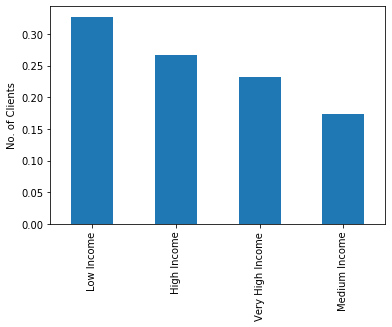

In [88]:
loan_app['INCOME_BINNED'].value_counts(normalize=True).plot.bar()
plt.ylabel("No. of Clients")
plt.show()

In [89]:
## These are the bins corresponding to Low, Medium, High, Very High incomes 
loan_app.AMT_INCOME_TOTAL.quantile([0.0,0.25,0.50,0.75,1.0])

0.000000      25650.000000
0.250000     112500.000000
0.500000     147150.000000
0.750000     202500.000000
1.000000   18000090.000000
Name: AMT_INCOME_TOTAL, dtype: float64

### Binning Annuity Amount

In [90]:
# sns.boxplot(loan_app.AMT_ANNUITY)
# loan_app.AMT_ANNUITY.describe()
loan_app.AMT_ANNUITY.quantile([0.5,0.75,0.8,0.9,0.95,0.99,1.0])

0.500000    24903.000000
0.750000    34596.000000
0.800000    37516.500000
0.900000    45954.000000
0.950000    53325.000000
0.990000    70006.500000
1.000000   258025.500000
Name: AMT_ANNUITY, dtype: float64

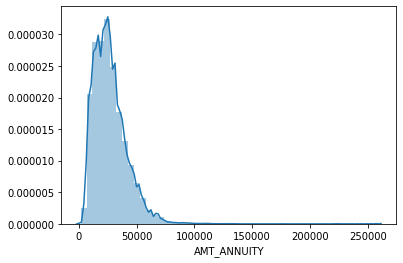

In [91]:
sns.distplot(loan_app.AMT_ANNUITY.dropna())
plt.show()

In [92]:
(loan_app.AMT_ANNUITY > 175000).sum()

44

In [93]:
#Similarly it seems to be a good idea to help in analysis to bin the ANNUITY amount too
# bins = loan_app.AMT_ANNUITY.quantile([0.0,0.25,0.50,0.75,1.0])

bins = [0,5000, 50000, 100000, 500000]
labels = ['Low Annuity','Medium Annuity', 'High Annuity', 'Very High Annuity']
loan_app['ANNUITY_BINNED'] = pd.cut(loan_app['AMT_ANNUITY'],bins, labels=labels)

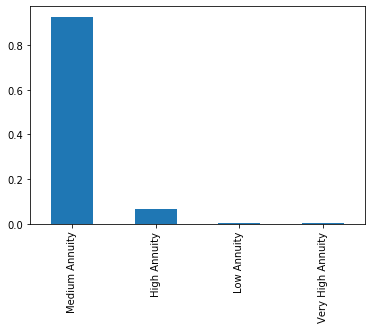

In [94]:
loan_app['ANNUITY_BINNED'].value_counts(normalize=True).plot.bar()
plt.show()

In [95]:
loan_app.AMT_ANNUITY.quantile([0.0,0.25,0.50,0.75,1.0])

0.000000     1615.500000
0.250000    16524.000000
0.500000    24903.000000
0.750000    34596.000000
1.000000   258025.500000
Name: AMT_ANNUITY, dtype: float64

### Binning Goods Price

In [96]:
loan_app.AMT_GOODS_PRICE.describe()

count    307232.000000
mean     538397.373962
std      369446.495968
min       40500.000000
25%      238500.000000
50%      450000.000000
75%      679500.000000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

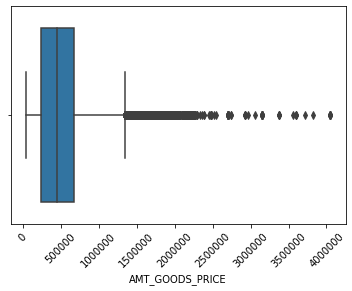

In [97]:
sns.boxplot(loan_app.AMT_GOODS_PRICE)
plt.xticks(rotation=45)
plt.show()

In [98]:
#Similarly it seems to be a good idea to help in analysis to bin the Goods amount too
# bins = loan_app.AMT_GOODS_PRICE.quantile([0.0,0.25,0.50,0.75,1.0])
#
bins = [0, 100000, 500000, 1000000, 4100000]
labels = ['Low Goods Price','Medium Goods Price', 'High Goods Price', 'Very High Goods Price']
loan_app['GOODS_PRICE_BINNED'] = pd.cut(loan_app['AMT_GOODS_PRICE'],bins, labels=labels)

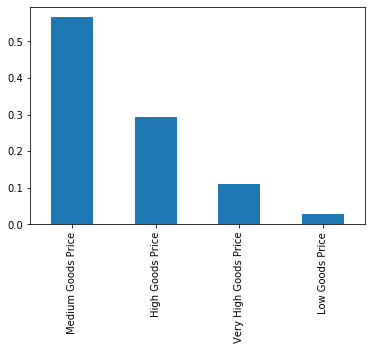

In [99]:
loan_app['GOODS_PRICE_BINNED'].value_counts(normalize=True).plot.bar()
plt.show()

**Concclusion:**
With increasing age there is lesser chance of defaulting or rather Lower age groups tend to default more!

### Check the number of retained rows in percentage

In [100]:
loan_app.shape

(307510, 42)

In [101]:
(265992/307511)*100

86.49836916402991

**86% of data has been retained and hence is a good amount of data to use for further analysis**

## Step 6:  Make new 'convenience' columns

In [102]:
# Inspect DAYS_BIRTH
loan_app.DAYS_BIRTH.describe()

count   307510.000000
mean    -16037.014338
std       4363.982643
min     -25229.000000
25%     -19682.000000
50%     -15750.000000
75%     -12413.000000
max      -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [103]:
# The days since birth is in negative values. Will convert them to positive years as a new column called `AGE`
loan_app['AGE'] = loan_app['DAYS_BIRTH']/-365

In [104]:
loan_app.AGE.describe()

count   307510.000000
mean        43.937026
std         11.956117
min         20.517808
25%         34.008219
50%         43.150685
75%         53.923288
max         69.120548
Name: AGE, dtype: float64

### Binning Age

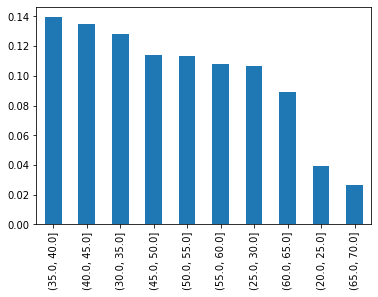

In [105]:
## Age Data Binning

loan_app['AGE_BINNED'] = pd.cut(loan_app['AGE'], bins = np.linspace(20, 70, num = 11))
loan_app['AGE_BINNED'].value_counts(normalize=True).plot.bar()
plt.show()

In [106]:
# Converting the employed days to positive number of years
loan_app['EMPLOYED_YEARS'] = loan_app.DAYS_EMPLOYED/(-365)

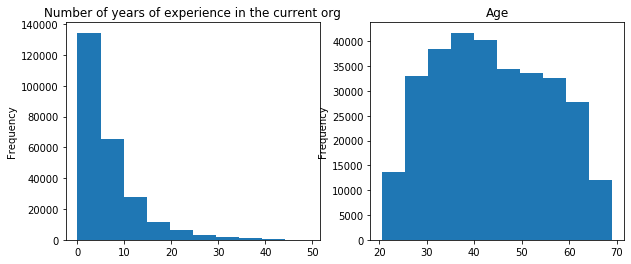

In [107]:
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
loan_app['EMPLOYED_YEARS'].plot.hist()
plt.title('Number of years of experience in the current org')
plt.subplot(1,2,2)
loan_app['AGE'].plot.hist()
plt.title('Age')
plt.show()

In [108]:
# Convert the -ve days columns into +ve
loan_app.DAYS_ID_PUBLISH = loan_app.DAYS_ID_PUBLISH * -1

In [109]:
loan_app.DAYS_REGISTRATION = loan_app.DAYS_REGISTRATION * -1

In [110]:
# drop the original columns for age and employement days
loan_app.drop(['DAYS_EMPLOYED','DAYS_BIRTH'], axis=1, inplace=True)


In [111]:
loan_app.shape


(307510, 43)

## Step 7: Data Analysis

#### - For Current Applications

### Step 7.1: Check the imbalance in  the data

In [112]:
100*loan_app['TARGET'].value_counts(normalize = True)

0   91.927092
1    8.072908
Name: TARGET, dtype: float64

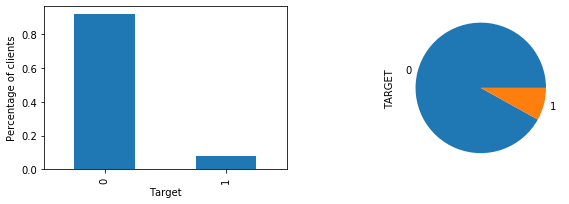

In [113]:
plt.figure(figsize=[10,3])
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
loan_app['TARGET'].value_counts(normalize = True).plot.bar()
plt.xlabel("Target")
plt.ylabel("Percentage of clients")
plt.subplot(1,2,2)
loan_app['TARGET'].value_counts(normalize = True).plot.pie()
plt.show()


**Conclusion:** This is a highly imbalanced data with 92% having repaid all the loans and only 8% failing to repay

In [114]:
default_df = loan_app[loan_app.TARGET == 1]

In [115]:
default_df.shape

(24825, 43)

In [116]:
non_default_df = loan_app[loan_app.TARGET == 0]

In [117]:
non_default_df.shape

(282685, 43)

In [118]:
default_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'INCOME_BINNED', 'ANNUITY_BINNED',
       'GOODS_PRICE_BINNED', 'AGE', 'AGE_

### Step 7.2 Univariate Analysis 

#### 7.2.1 For Categorical Variables - DEFAULTERS (TARGET=1)

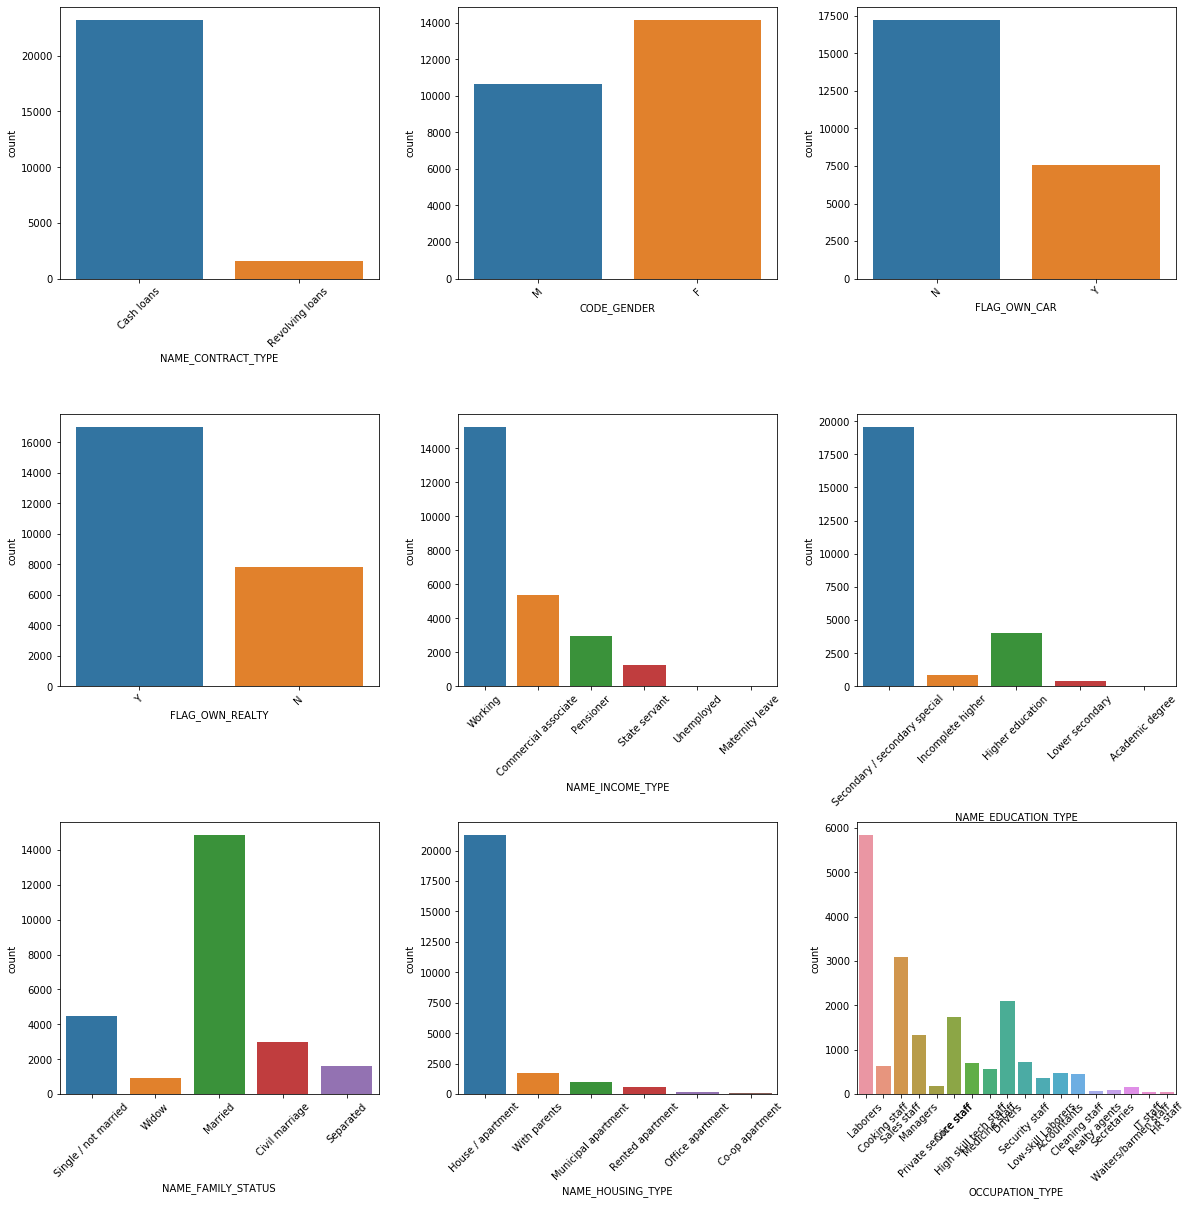

In [119]:
plt.figure(figsize = [20,20])
cat_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.subplots_adjust(hspace=0.50,wspace=0.25)
for i,col in enumerate(cat_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(default_df[col])
    plt.xticks(rotation=45)
plt.show()

#### Conclusions from Univariate Analysis of Categorical variables related to  DEFAULTERS
The following category of people were higher or highest in defaults:
1. Cash loans more than revolving loans
2. Females compared to males
3. People who did not have their own car 
4. Surprisingly, people who had their own Realty
5. Working professionals were the highest defaulters out of 6 categories
6. People with only Secondary / secondary special education were the highest
7. Married people - highest
8. People living in thier own house/Apartment
9. Labourers by occupation

#### 7.2.2 For Categorical Variables - For Non-Defaulters

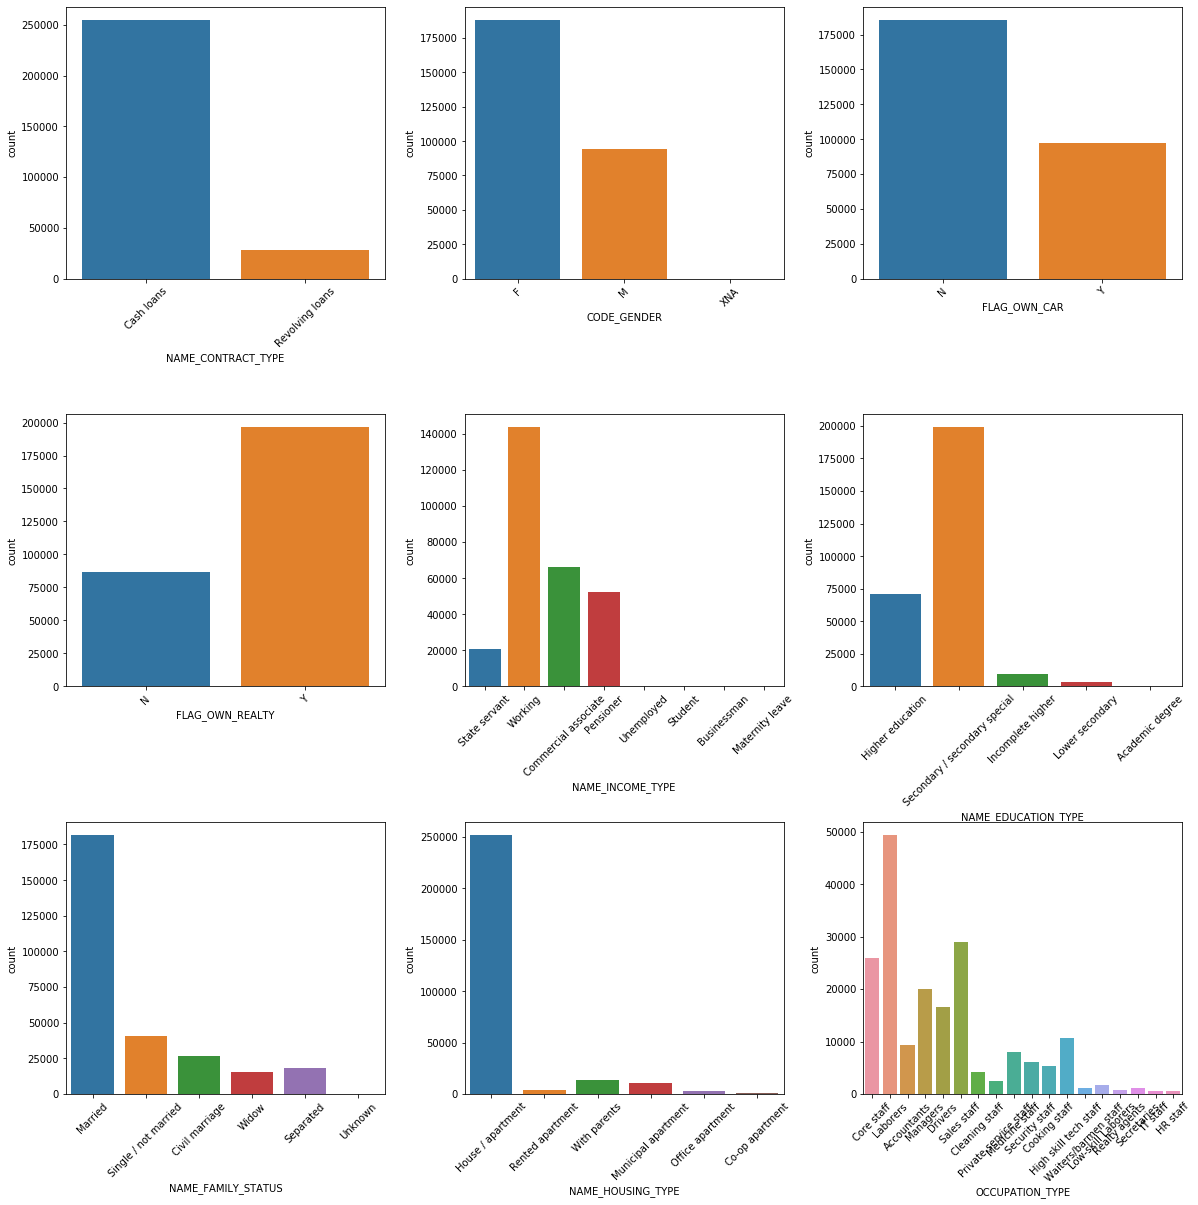

In [120]:
plt.figure(figsize = [20,20])
cat_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.subplots_adjust(hspace=0.50,wspace=0.25)
for i,col in enumerate(cat_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(non_default_df[col])
    plt.xticks(rotation=45)
plt.show()



#### Conclusions from Univariate Analysis of Categorical variables related to  NON-DEFAULTERS
The following category of people were higher or highest in non-defaults:
1. The Type of loans not-defaulted too were more of Cash loans than revolving loans
2. Females compared to males
3. People who did not have their own car 
4. People who had their own Realty
5. State-servants were the highest non-defaulters out of 6 categories
6. Again people with only Seconday / seconday special education were the highest non-defaulters
7. Again Married people - highest non-defaulters
8. Again People living in thier own house/Apartment
9. Again Labourers by occupation

#### 7.2.3 Ordered Categorical Variables From Numerical Variables (by Binning) - For Defaulters

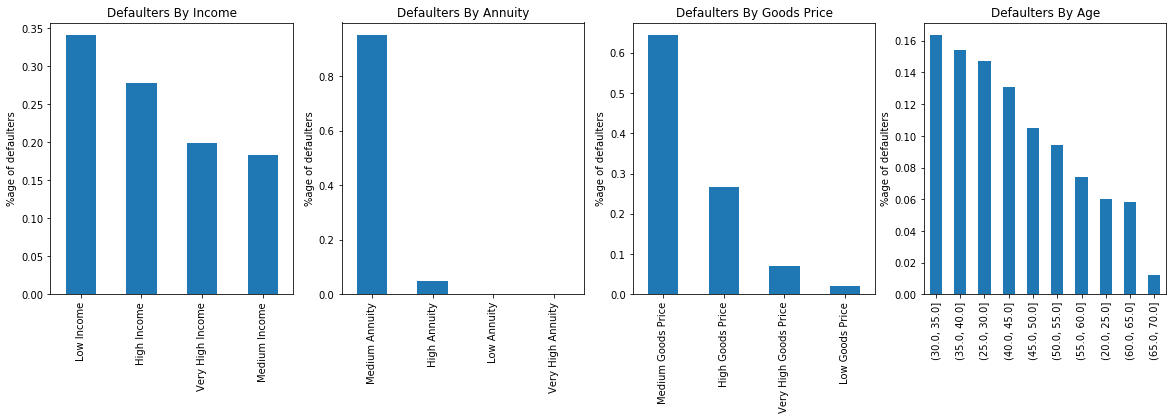

In [121]:
plt.figure(figsize = [20, 5])
plt.subplot(1,4,1)
default_df.INCOME_BINNED.value_counts(normalize=True).plot.bar()
plt.title("Defaulters By Income")
plt.ylabel("%age of defaulters")
plt.subplot(1,4,2)
default_df.ANNUITY_BINNED.value_counts(normalize=True).plot.bar()
plt.title("Defaulters By Annuity")
plt.ylabel("%age of defaulters")
plt.subplot(1,4,3)
default_df.GOODS_PRICE_BINNED.value_counts(normalize=True).plot.bar()
plt.title("Defaulters By Goods Price")
plt.ylabel("%age of defaulters")
plt.subplot(1,4,4)
default_df.AGE_BINNED.value_counts(normalize=True).plot.bar()
plt.title("Defaulters By Age")
plt.ylabel("%age of defaulters")
plt.show()

#### Conclusions from Univariate Analysis of Binnned variables related to DEFAULTERS
The following category bins of income/annutiy/price/age were defaulted the most:
1. Max Defaulters - close to 35% are from the low income bracket (0 to 25650)
2. More than 85% of defaulters has a Medium Annuity (5000 to 50000)
3. Close to 65% of the price of goods for which default are in the Medium range (5000 to 50000)
4. The lower age groups from 25 to 40 years are the highest defaulters.

#### 7.2.4 Ordered Categorical Variables From Numerical Variables (by Binning) - For Non-Defaulters

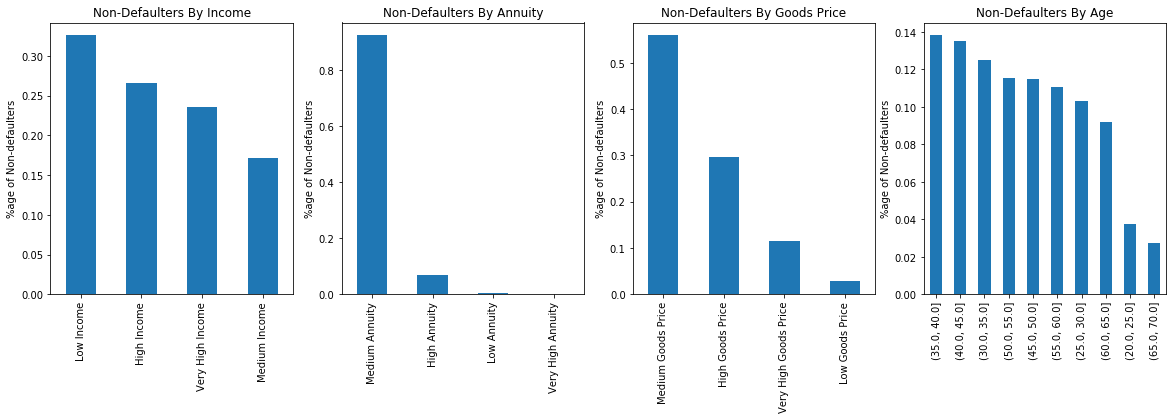

In [122]:
plt.figure(figsize = [20, 5])
plt.subplot(1,4,1)
non_default_df.INCOME_BINNED.value_counts(normalize=True).plot.bar()
plt.title("Non-Defaulters By Income")
plt.ylabel("%age of Non-defaulters")
plt.subplot(1,4,2)
non_default_df.ANNUITY_BINNED.value_counts(normalize=True).plot.bar()
plt.title("Non-Defaulters By Annuity")
plt.ylabel("%age of Non-defaulters")
plt.subplot(1,4,3)
non_default_df.GOODS_PRICE_BINNED.value_counts(normalize=True).plot.bar()
plt.title("Non-Defaulters By Goods Price")
plt.ylabel("%age of Non-defaulters")
plt.subplot(1,4,4)
non_default_df.AGE_BINNED.value_counts(normalize=True).plot.bar()
plt.title("Non-Defaulters By Age")
plt.ylabel("%age of Non-defaulters")
plt.show()

#### Conclusions from Univariate Analysis of Binnned variables related to  NON-DEFAULTERS
The following category bins of income/annutiy/price/Age were least defaulted:
1. Nearly 35% of low income group do not default
2. Medium annuity is highly non-defaulted - Close to 85% of non-defaulters has a Medium Annuity (5000 to 50000)
3. Close to 55% of the price of goods for which non-default happened were in the Medium range (5000 to 50000)
4. 35 to 40 age group has the large non-defaulters

#### 7.2.5 For Continuous Variables (Numerical) - For Defaulters

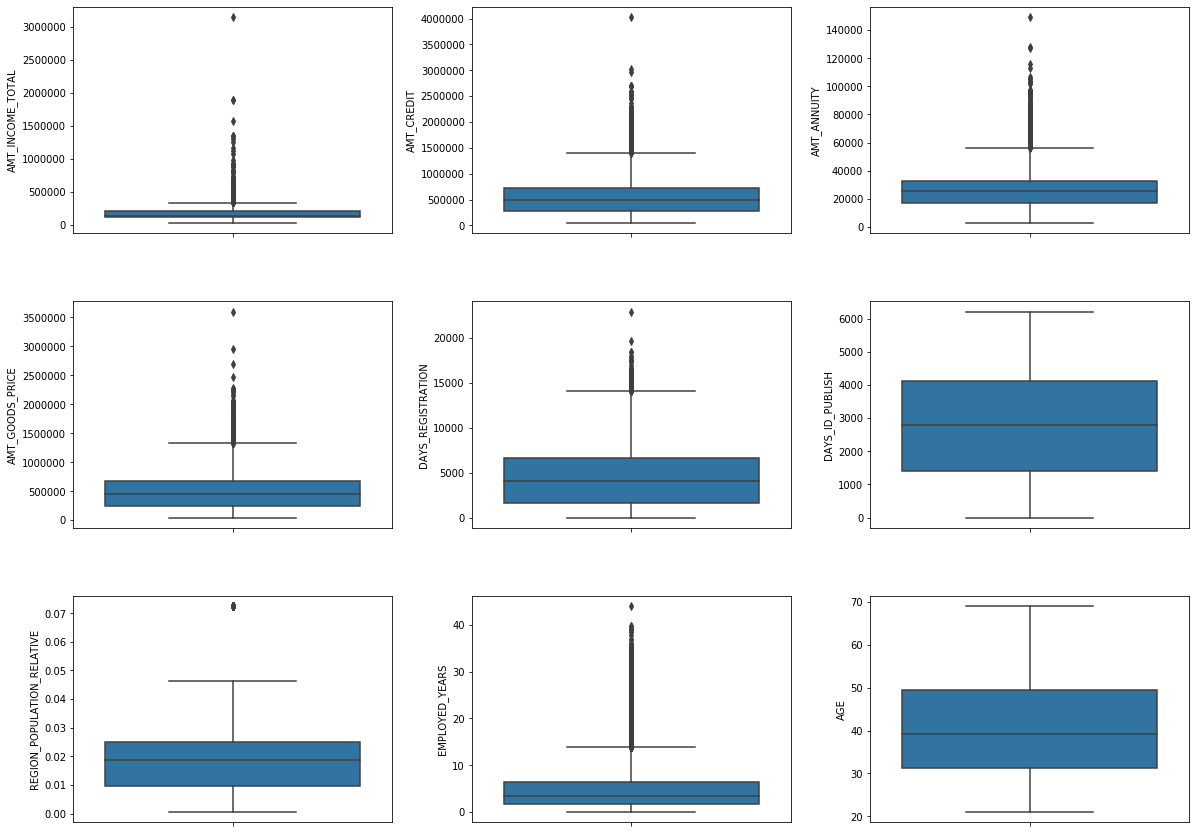

In [123]:
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'REGION_POPULATION_RELATIVE','EMPLOYED_YEARS','AGE']
plt.figure(figsize=[20,15])
plt.subplots_adjust(hspace=0.30,wspace=0.25)
for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(y = default_df[col].dropna())
    plt.xticks(rotation=45)
    
plt.show()

#### Observations about Continuous variables for Defaulters (Target = 1)
1. The spread of income is very narrow and is largely below 5 lakh
2. Credit, annuity and goods price go in tandom - with the credit being below 15 lakh and annity being below 60000
3. Days since registration has a median of less than 5000 days but has a max of 15000 days!
4. Days since ID change seems to be evenly spread with a median of 3000 and max of 6000 days
5. The region's relative population is having a median of 0.02
6. Employed years has a long tail bbut the median less than 5 years
7. The median age of defaulters is around 40 years

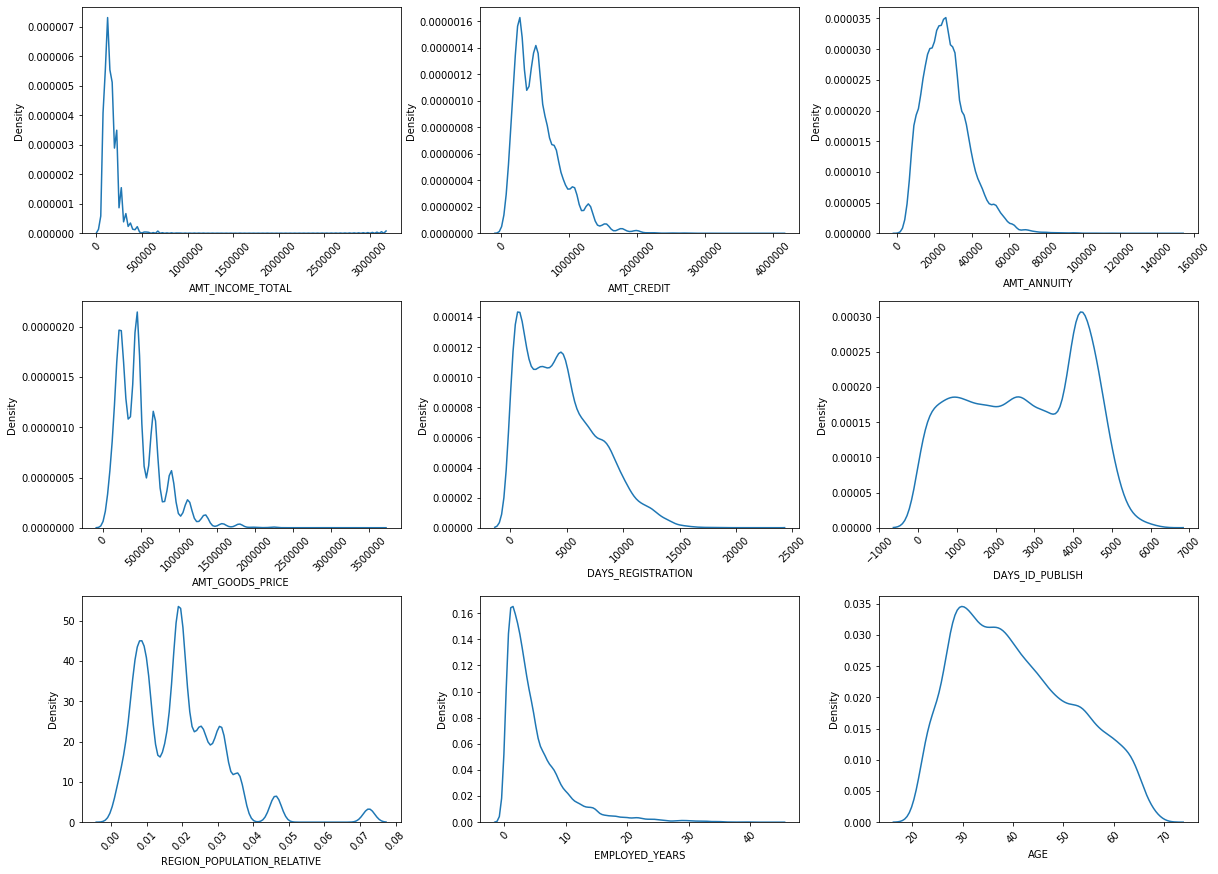

In [124]:
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'REGION_POPULATION_RELATIVE','EMPLOYED_YEARS','AGE']
plt.figure(figsize=[20,15])
plt.subplots_adjust(hspace=0.30,wspace=0.25)
for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.distplot(default_df[col].dropna(),hist=False)
    plt.xticks(rotation=45)
    plt.ylabel("Density")
    
plt.show()

#### Observations from Univariate Analysis for Continuous Variables (TARGET = 1)
The following are the highest in defaulters
1. Income group < 500000
2. Credit Amount < 1000000
3. Annuity Amount < 75000
4. Goods Price < 1000000
5. Days before the application client changed his registration < 5000
6. days before the application client changed the identity document with which he applied for the loan = between 4000 and 5000 days - there is not too much of a pattern here
7. Region's relative population does not show any distinct pattern. However it peaks at 0.02
8. Employed less than 10 years have defaulted more
9. Age group till 30 has higher default rate


#### 7.2.6 For Continuous Variables (Numerical ) - For Non-Defaulters

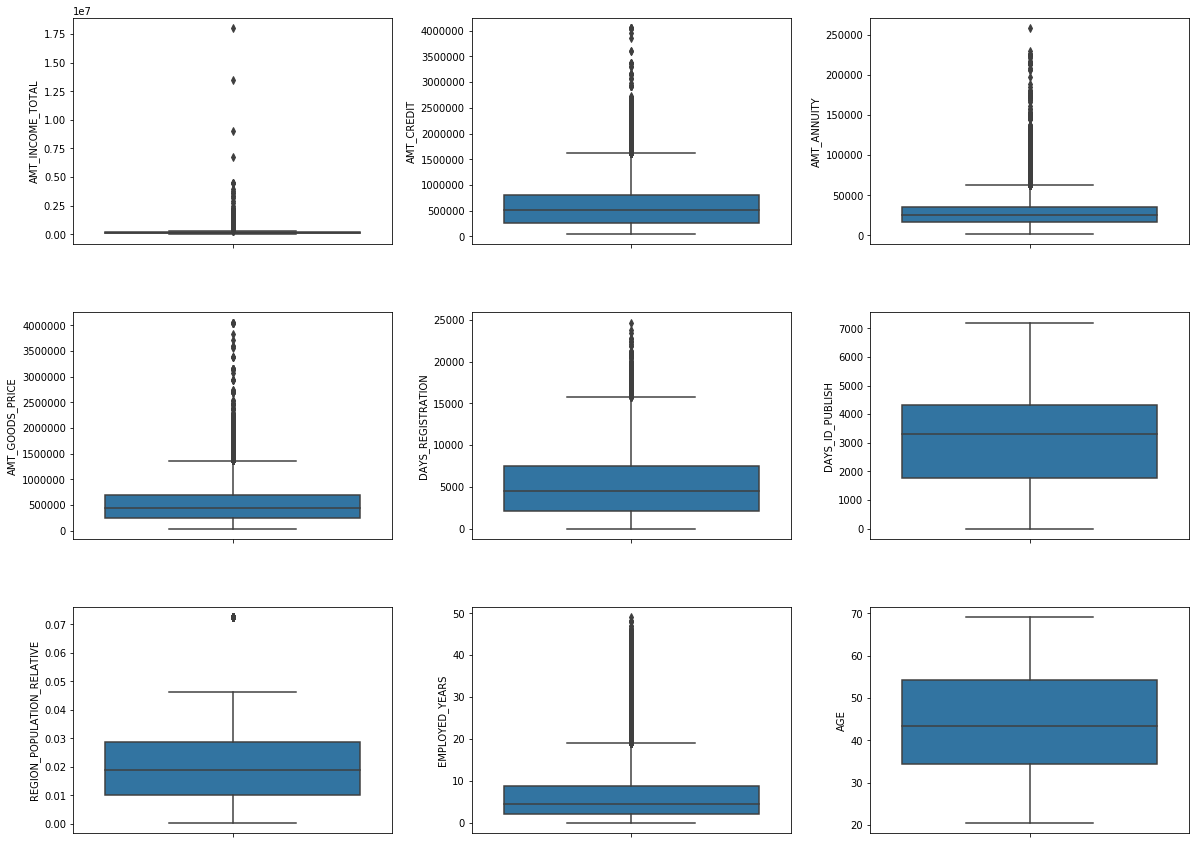

In [125]:
plt.figure(figsize=[20,15])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'REGION_POPULATION_RELATIVE','EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.30,wspace=0.25)

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=non_default_df[col].dropna())
    plt.xticks(rotation=45)
    
plt.show()

#### Observations:
1. Most of the income is very low, hovering around 5 lakh
2. Credit and goods price have a median of about 5 lakh
3. Median annuity is about 30000
4. Days since registration and days since ID change almost show the same behaviour as defautlers
5. The median of employed years seems slightly higher
6. The median age of non-defaulters is more hovering around 42 years.

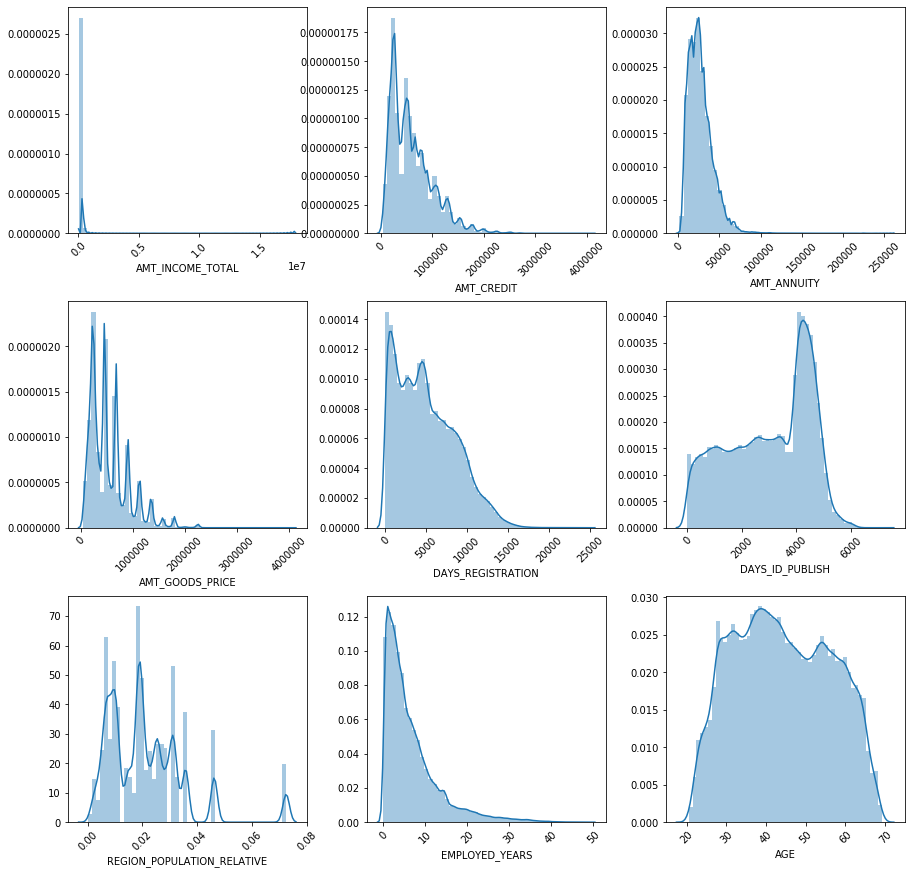

In [126]:
plt.figure(figsize=[15,15])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'REGION_POPULATION_RELATIVE','EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.30,wspace=0.25)

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.distplot(non_default_df[col].dropna(),hist=True)
    plt.xticks(rotation=45)

#### Observations from Univariate Analysis for Continuous Variables (TARGET = 0)
The following are the highest in non-defaulters
1. Lower Income group  as well as income up to 1.8 Cr
2. Number of non-defaulters is high in the lower credit range and it keeps trailing off with higher credits
3. Annuity Amount < 100000
4. Goods Price < 2000000
5. Again, Days before the application client changed his registration < 20000
6. Again, days before the application client changed the identity document with which he applied for the loan = between 4000 and 6000 days - there is not too much of a pattern here
7. Again, it is very similar relationship to region's relative population as in defaulters group
8. Again, Lower employed years have not defaulted as well
9. Pay back is spread across all age groups


### Step 7.3 Bivariate Analysis

#### 7.3.1 Continuous-Continuous Variables - For Defaulters

In [127]:
corr_mat_def = default_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'REGION_POPULATION_RELATIVE','EMPLOYED_YEARS','AGE','EXT_SOURCE_2','EXT_SOURCE_3']].corr()

corr_mat_non_def = non_default_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'REGION_POPULATION_RELATIVE','EMPLOYED_YEARS','AGE','EXT_SOURCE_2','EXT_SOURCE_3']].corr()

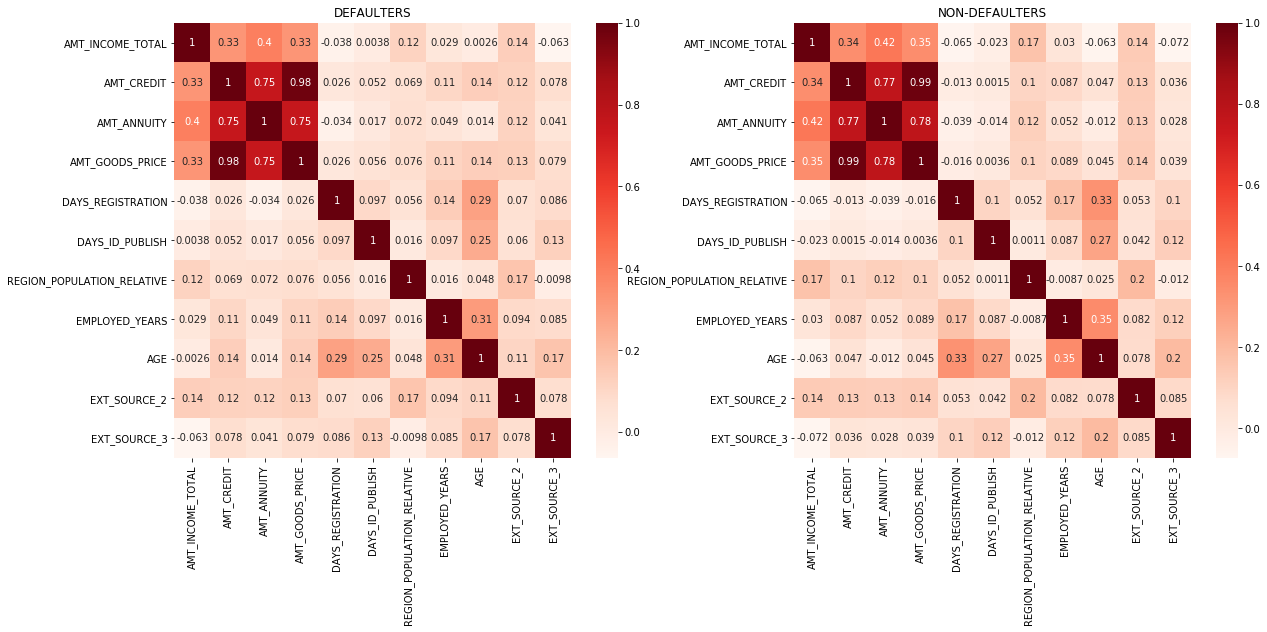

In [128]:

plt.figure(figsize = [20, 8])
plt.subplot(1,2,1)
sns.heatmap(corr_mat_def,annot=True, cmap='Reds')
plt.title("DEFAULTERS")
plt.subplot(1,2,2)
plt.subplots_adjust(wspace=0.25)
sns.heatmap(corr_mat_non_def,annot=True, cmap='Reds')
plt.title("NON-DEFAULTERS")
plt.show()

**Observation**: Income, credit, annuity, goods price are highly coorelated. The Region population relative is slightly correlated to income. Hence these 4 variables can be plotted together in a pair plot to view visually.

Also, even though it is not a very strong correlation, there is a coorelation between age and employed years, days of id changed before loan applicaiton and days since registration. These 4 variables can be plotted together in a pair plot to see their relation ships

**Note**: The correlations are very similar for bpth defaulters or non-defautlers - with only slightly stroger correlations in non-defaulters

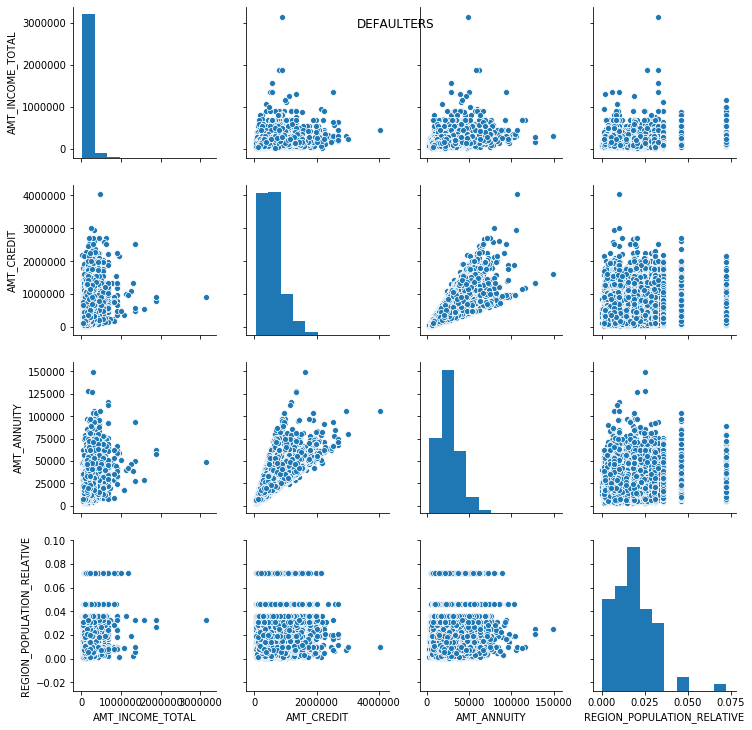

In [129]:
sns.pairplot(data=default_df, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE'])
plt.suptitle("DEFAULTERS")
plt.show()

#### Conclusion:
1. There is trend visible that the higher the income, the higher the credit - though not ver strong coorelation
2. Obviously, the higher the credit, the higher the annuity


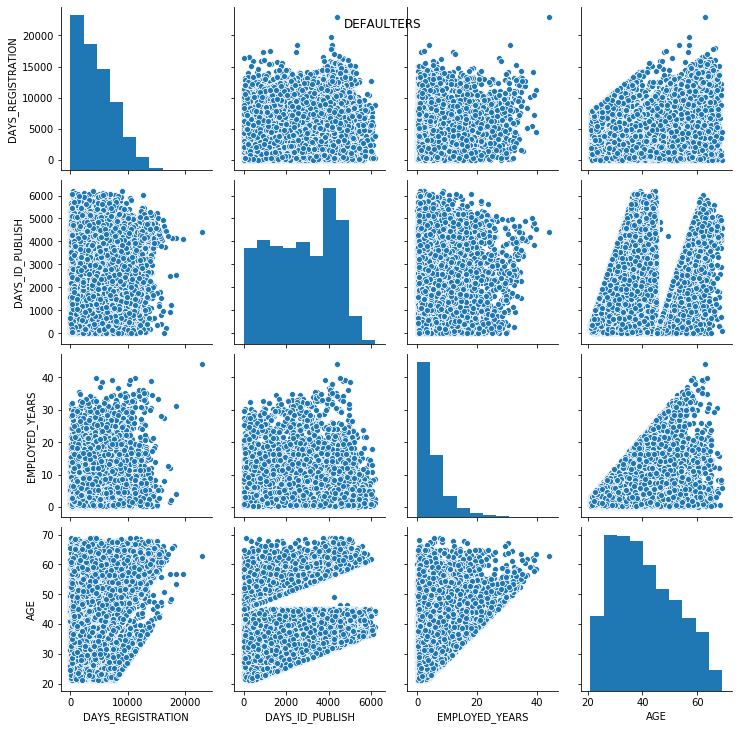

In [130]:
sns.pairplot(data=default_df, vars=['DAYS_REGISTRATION','DAYS_ID_PUBLISH','EMPLOYED_YEARS','AGE'])
plt.suptitle("DEFAULTERS")
plt.show()

#### Conclusion:
You can clearly see a coorelation with Age for the other 3 variables. 
1. With age, number of employed years increase
2. The clusters in ID changes seem distinct. At 20, people seem to have changed or created their new IDs for the 1st time. Until 45, they do not seem to change that much. Again at 45, they change the IDs and then keep the same till 70. 
3. Even the number days sincec registration are fewer at 10 and increase with age

#### 7.3.2 Continuous-Continuous Variables - For Non-Defaulters

#### Pair-plot for Non-Defaulters

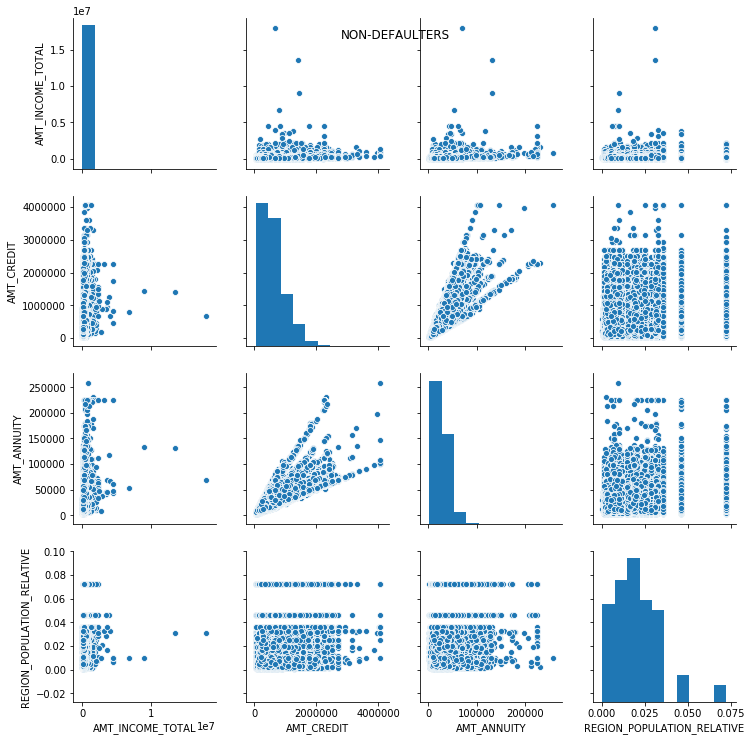

In [131]:
sns.pairplot(data=non_default_df, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE'])
plt.suptitle("NON-DEFAULTERS")
plt.show()

#### Conclusion:
1. There is trend visible that the higher the income, the higher the credit - though not very strong coorelation.This is not very visible because of the very high income values in this graph
2. Obviously, the higher the credit, the higher the annuity


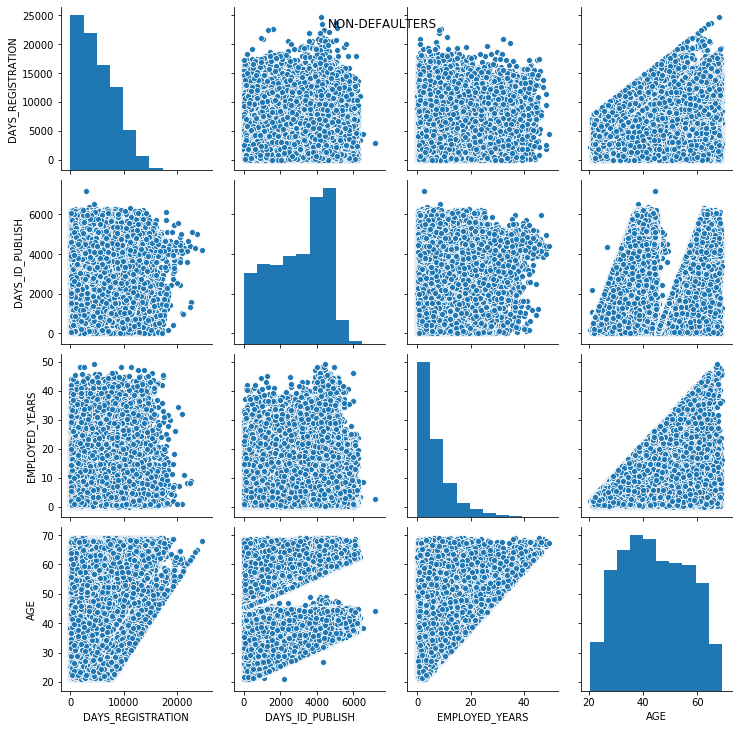

In [132]:
sns.pairplot(data=non_default_df, vars=['DAYS_REGISTRATION','DAYS_ID_PUBLISH','EMPLOYED_YEARS','AGE'])
plt.suptitle("NON-DEFAULTERS")
plt.show()

#### Conclusion:
You can clearly see a coorelation with Age for the other 3 variables. 
1. With age, number of employed years increase
2. The clusters in ID changes seem distinct. At 20, people seem to have changed or created their new IDs for the 1st time. Until 45, they do not seem to change that much. Again at 45, they change the IDs and then keep the same till 70. 
3. Even the number days sincec registration are fewer at 10 and increase with age

####  Categorical-Numerical Variables - For Defaulters and Non-Defaulters

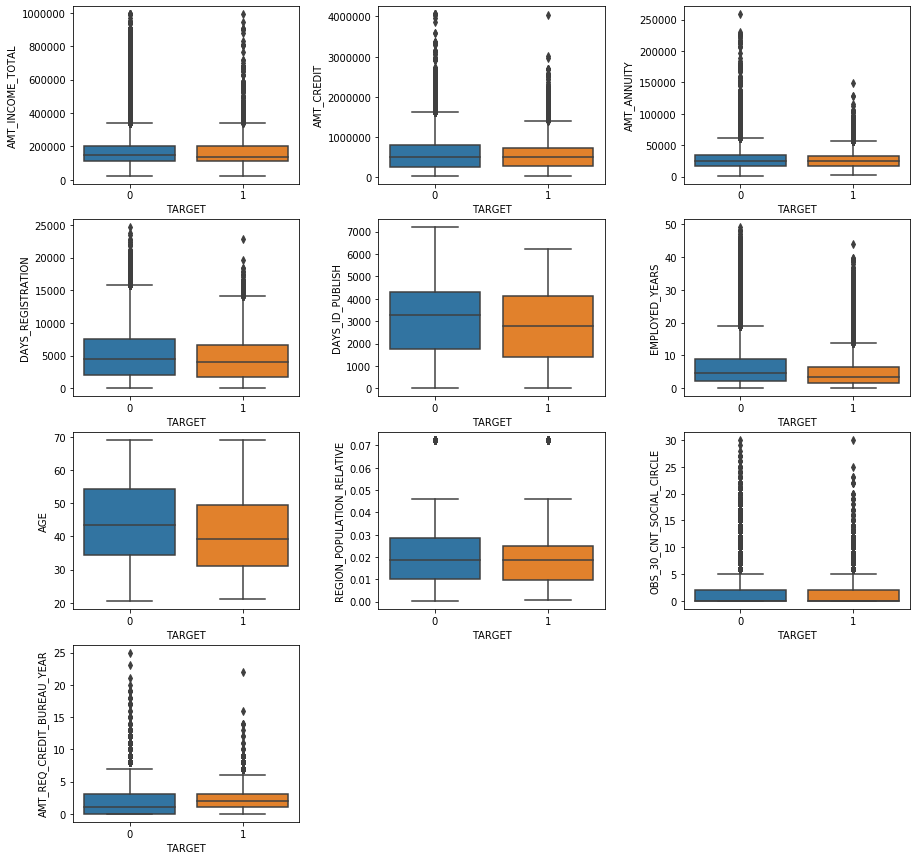

In [133]:
plt.figure(figsize=[15,15])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE','REGION_POPULATION_RELATIVE','OBS_30_CNT_SOCIAL_CIRCLE',
             'AMT_REQ_CREDIT_BUREAU_YEAR']
plt.subplots_adjust(wspace=0.35)
for i,col in enumerate(cont_cols):
    # Trimming a few outliers to adjust the scale for readability of quartiles and medians
    plt.subplot(4,3,i+1)
    if col == 'AMT_INCOME_TOTAL':
        sns.boxplot(x = 'TARGET', y = col, data = loan_app[loan_app['AMT_INCOME_TOTAL']<1000000])
    elif col == 'OBS_30_CNT_SOCIAL_CIRCLE':
        sns.boxplot(x = 'TARGET', y = col, data = loan_app[loan_app['OBS_30_CNT_SOCIAL_CIRCLE']<35])
    else: 
        sns.boxplot(x = 'TARGET', y = col, data = loan_app)
    
plt.show()

#### Conclusions:

1. The median income of defaulters is lower - 135000.0 versus 148500.0
2. There is not too much of a difference in the annuity and credit between the 2 categories
3. The spread and the median of 'days since registration' is higher for non-defaulters (Median: 4544.0 versus 4056.0) and (Spread: 5505 vs 4975)
4. 'Days since ID change' is also lower median for defaulters - 2797.0 versus 3295.0
5. Median number of employed years is also lower for defaulters 3.36 versus 4.63 years
6. Median Age is also lower for defaulters - 39.12 versus 43.49 years
9. The 75th percentile for the relative region population is lower for defaulters and so is the spread - 0.025164 vs 0.028663
10. The median number of enquiries with credit bureau in the last year is higher for defaulters - 2 versus 1


#### 7.3.3 Categorical-Numerical Variables - For Defaulters

In [134]:
def p75(x):
    return np.quantile(x,0.75)

def p25(x):
    return np.quantile(x,0.25)
    
def spread(x):
    return (p75(x) - p25(x))

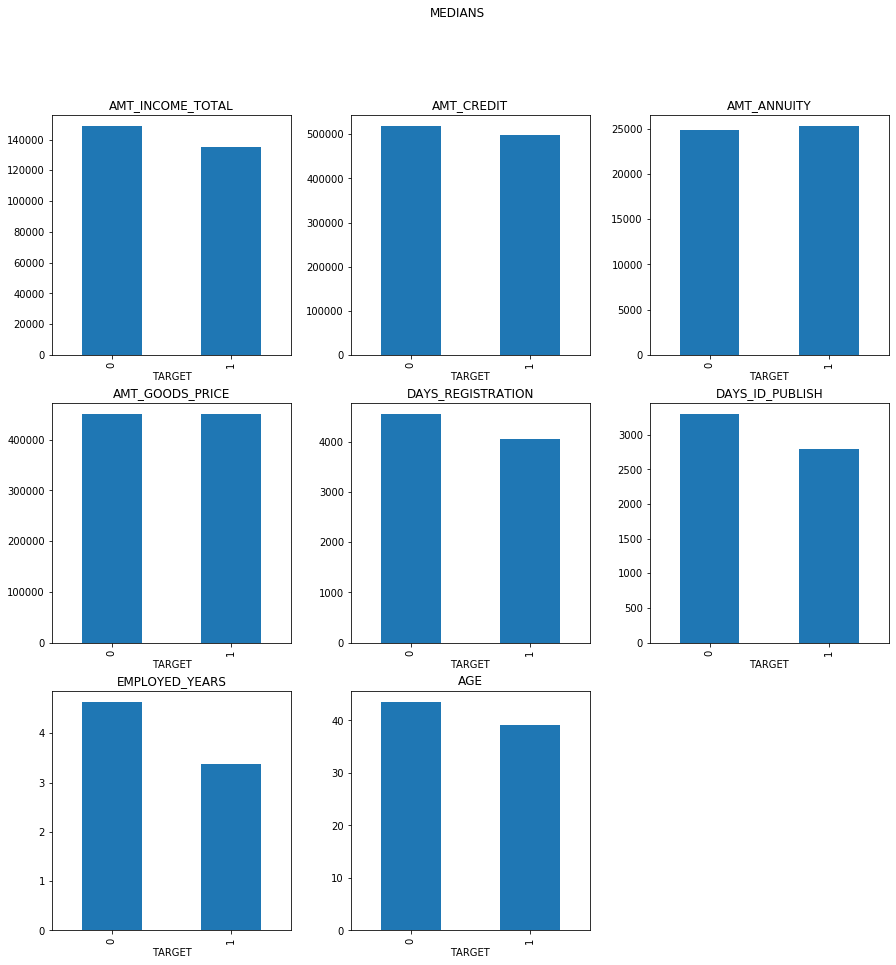

In [135]:
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.figure(figsize=[15,15])

gp_var = loan_app.groupby('TARGET')
plt.subplots_adjust(wspace=0.25)
for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
#     gp_var[col].aggregate(['mean','median',p75, spread]).plot.bar()
    gp_var[col].median().plot.bar()
    plt.title(col)
    plt.suptitle('MEDIANS')
plt.show()


## Plots that Analyse Categorical-Numerical Variables (Other than TARGET)

- With Target - already done above

### Categorical-Numerical Variable Analysis for DEFAULTERS 

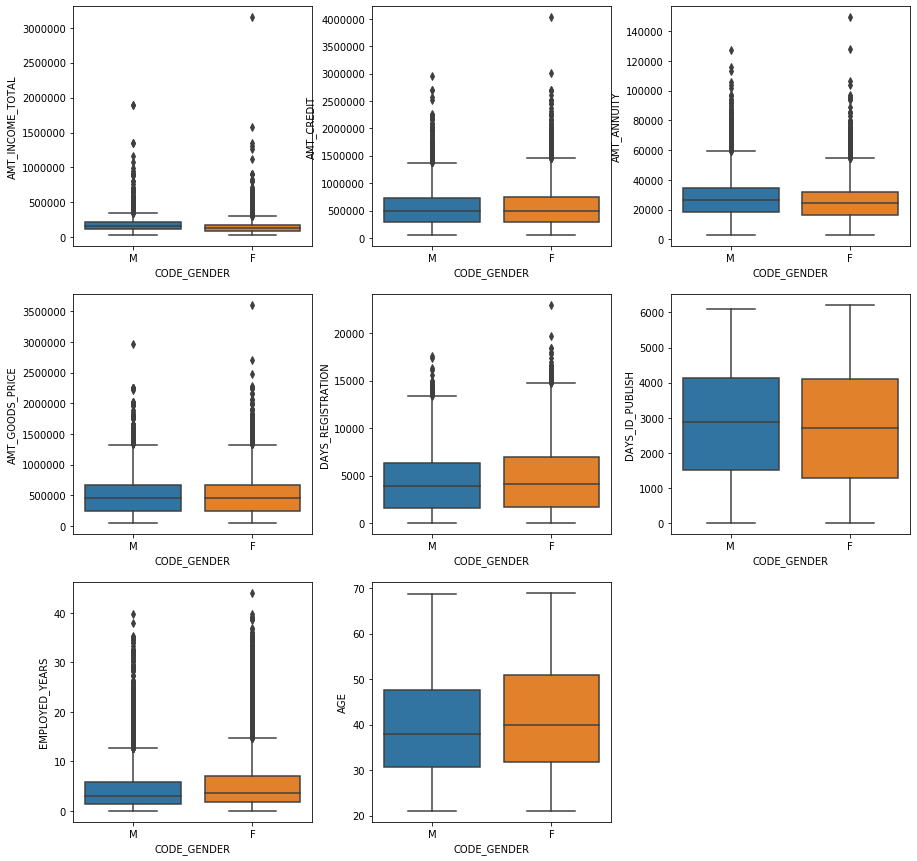

In [136]:
plt.figure(figsize=[15,15])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(wspace=0.25)
for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'CODE_GENDER', y = col, data = default_df)

plt.show()


**Conclusion:** There does not seem to be an differential corelation between Gender and other continuous variables

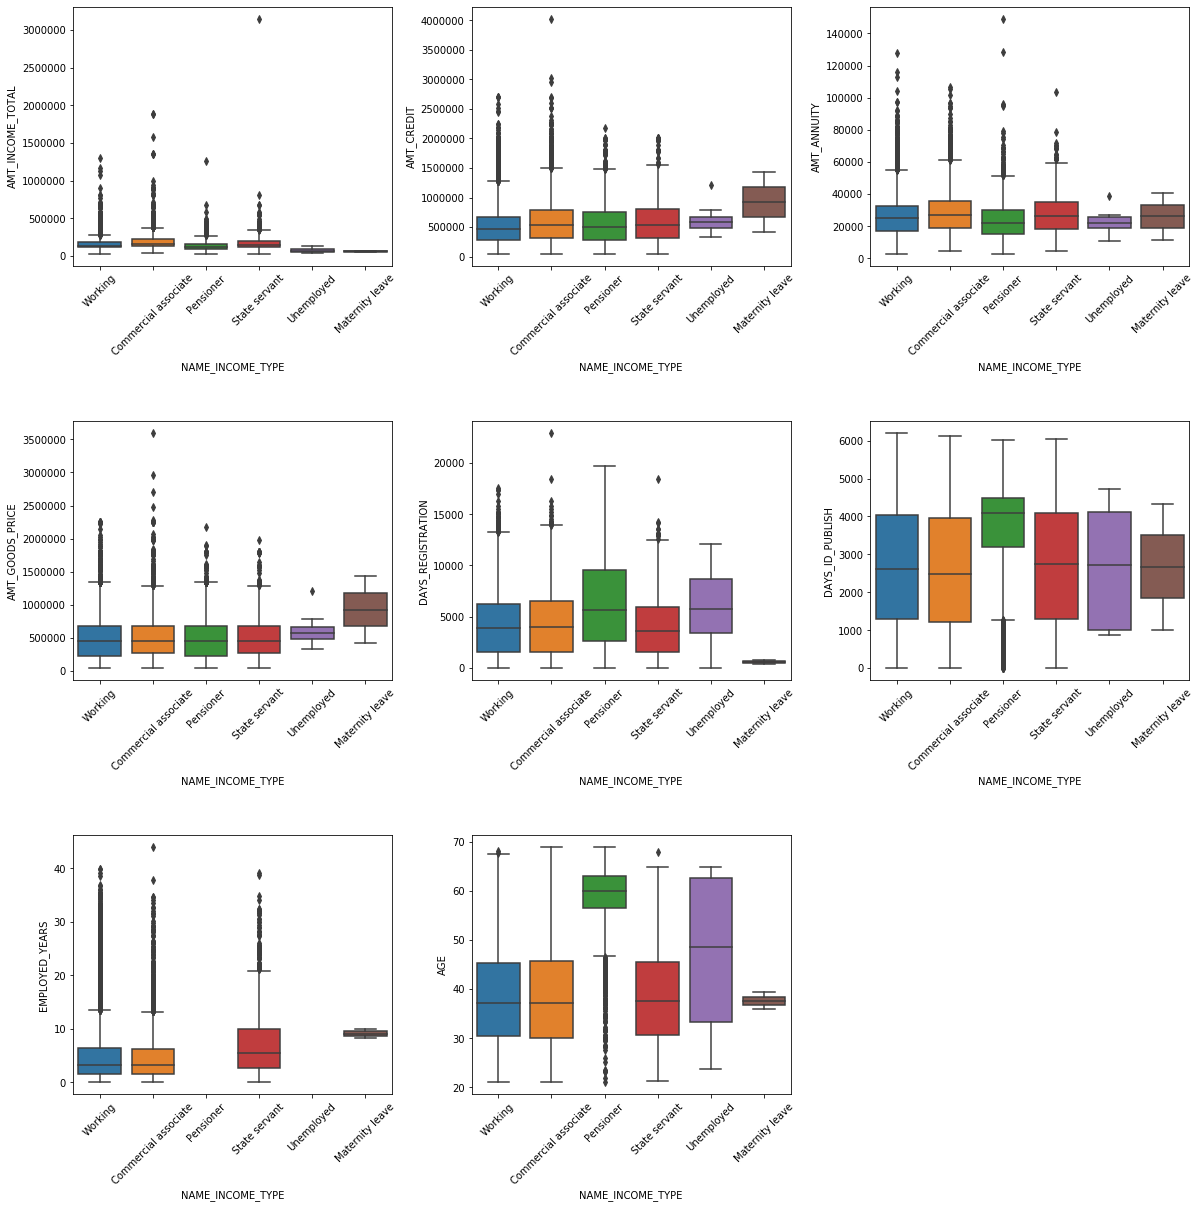

In [137]:
plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)
for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'NAME_INCOME_TYPE', y = col, data = default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusion:** It can be clearly noticed that those on Maternity leave have the least spread of income but are the ones taking the credit higher than all other employment types and price of goods they are buying is also above the other categories of people. 

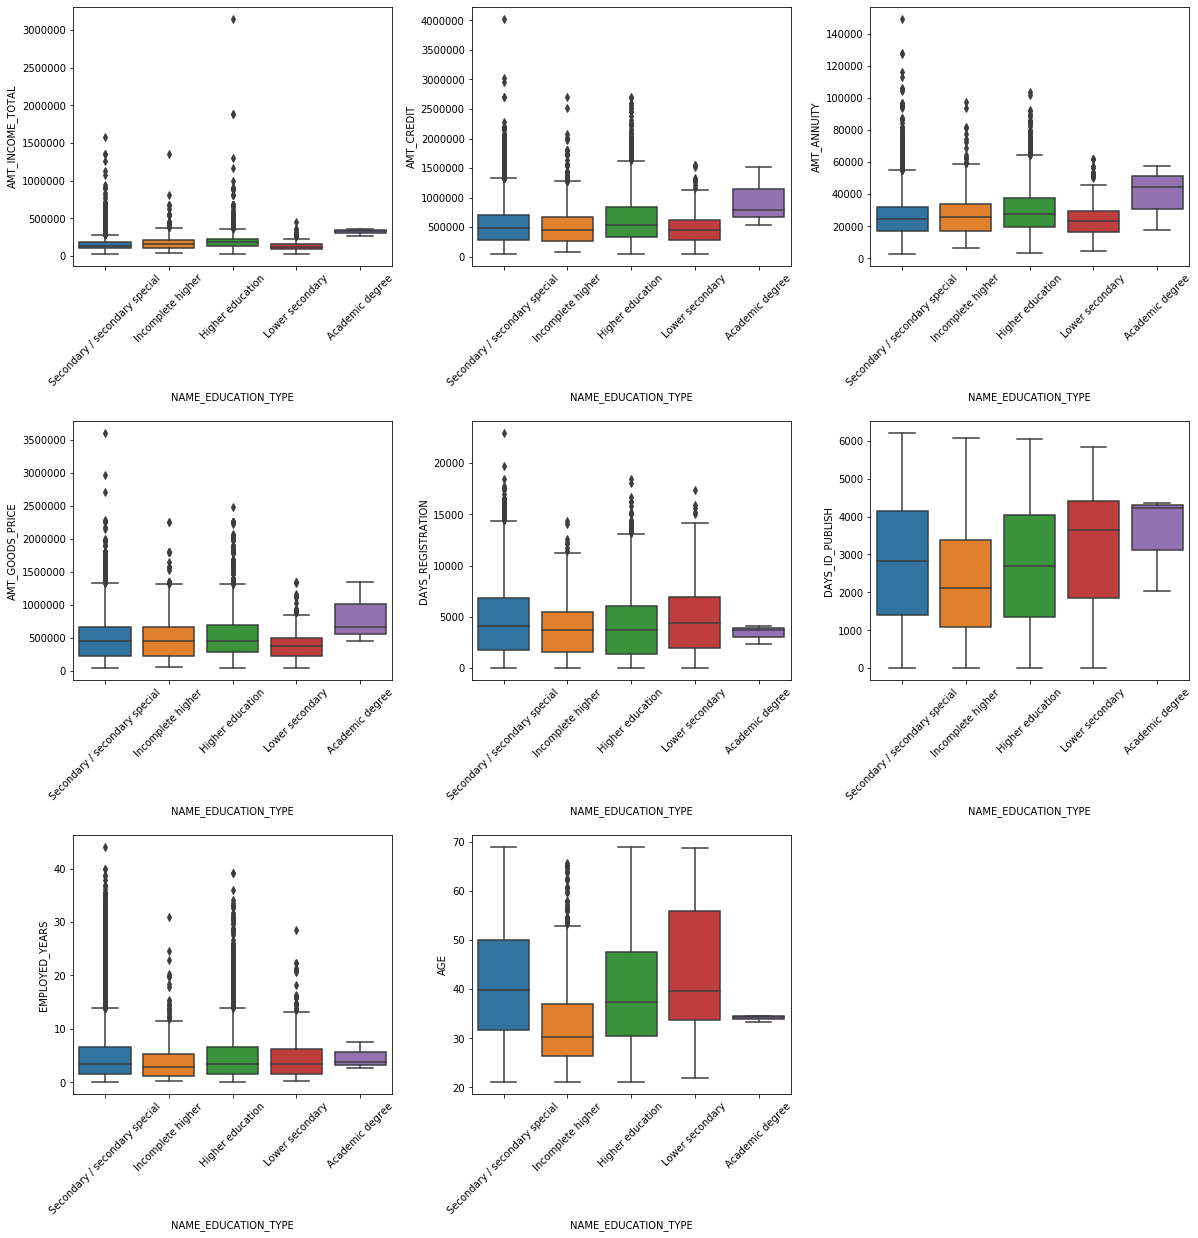

In [138]:
plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)
for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = col, data = default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusions:** 
1. It is very clear that those with Academic degrees are having higher income, higher credit, higher annuity and higher goods price
2. The age group of the incomplete higher is clearly lower
3. The age group of Academic degree is all below 40!! 
4. The employed number of years as expected are mostly concentrated below 10 years, as shown from an earlier analysis too.

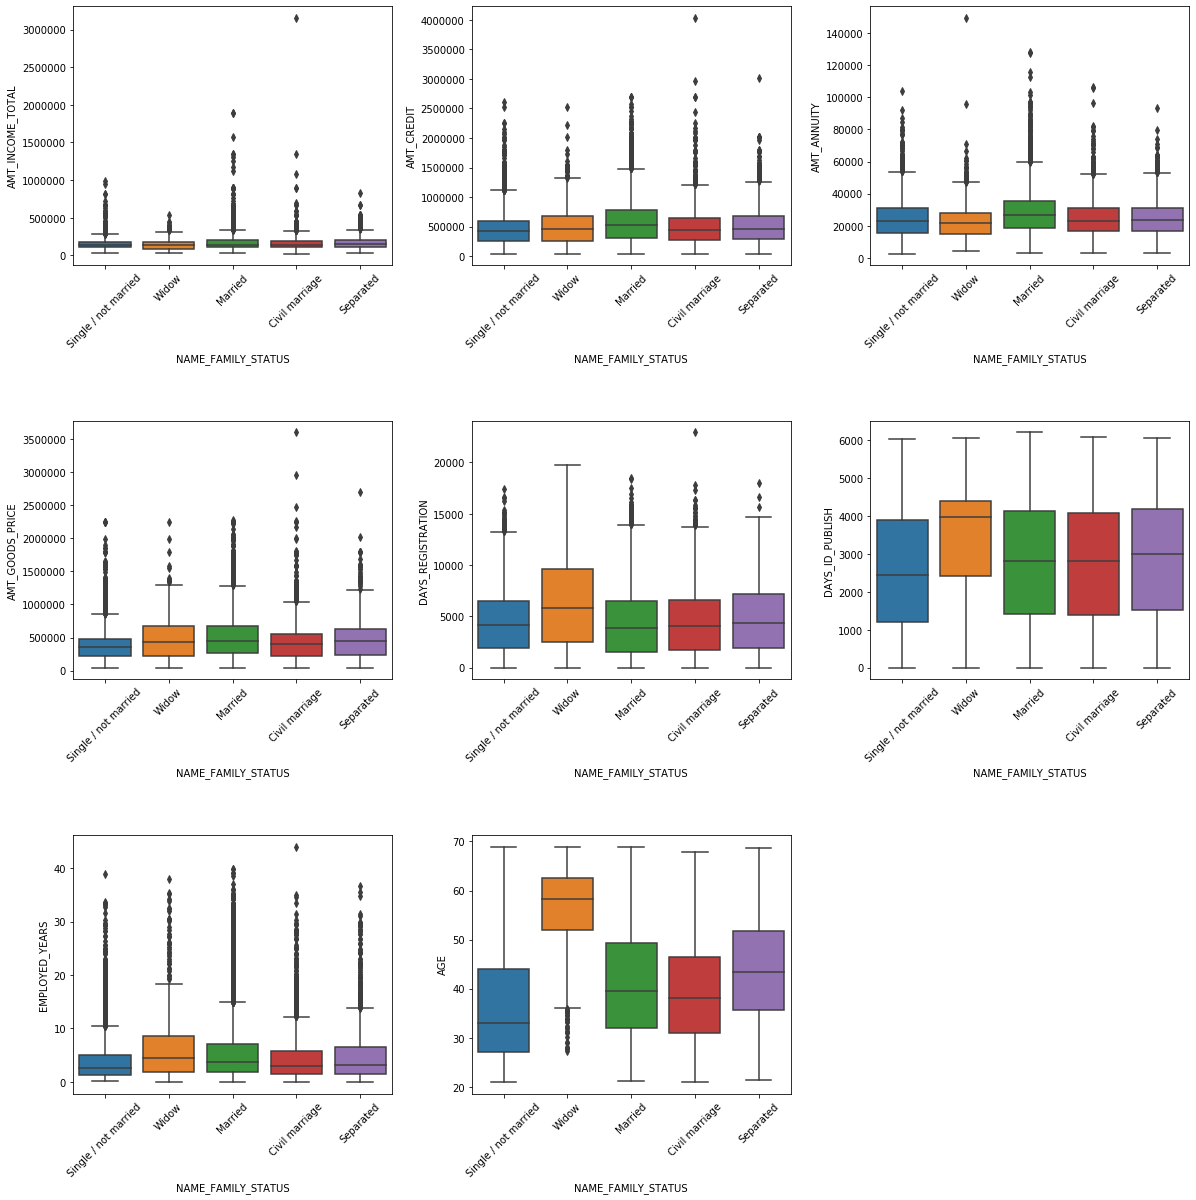

In [139]:
plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'NAME_FAMILY_STATUS', y = col, data = default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusions:**
1. Income does not have any relation with Family status. Similarly goods price too
2. Credit and Annuity seem to be slightly on the higher side for married people
3. The days since registration and days of id change seem to be higher for widows
4. As probably understandable, number of employed years and age also seem to be higher for Widows

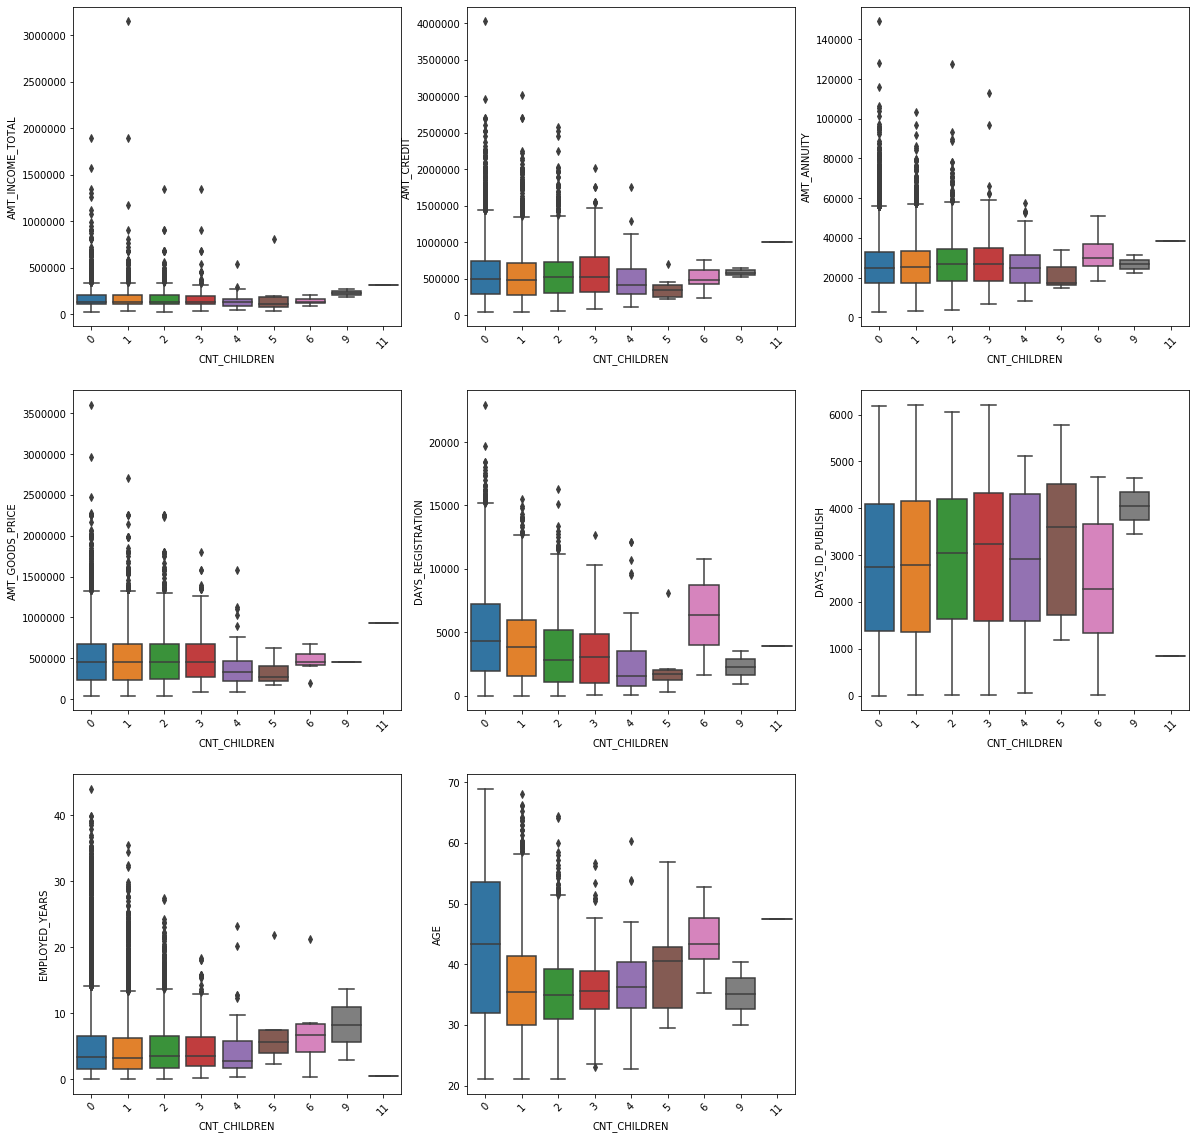

In [140]:
plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'CNT_CHILDREN', y = col, data = default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusions:**
1. People with 9 or 11 children have higher incomes
2. People with greater number of children are also taking higher credits, higher annuity and higher goods price.

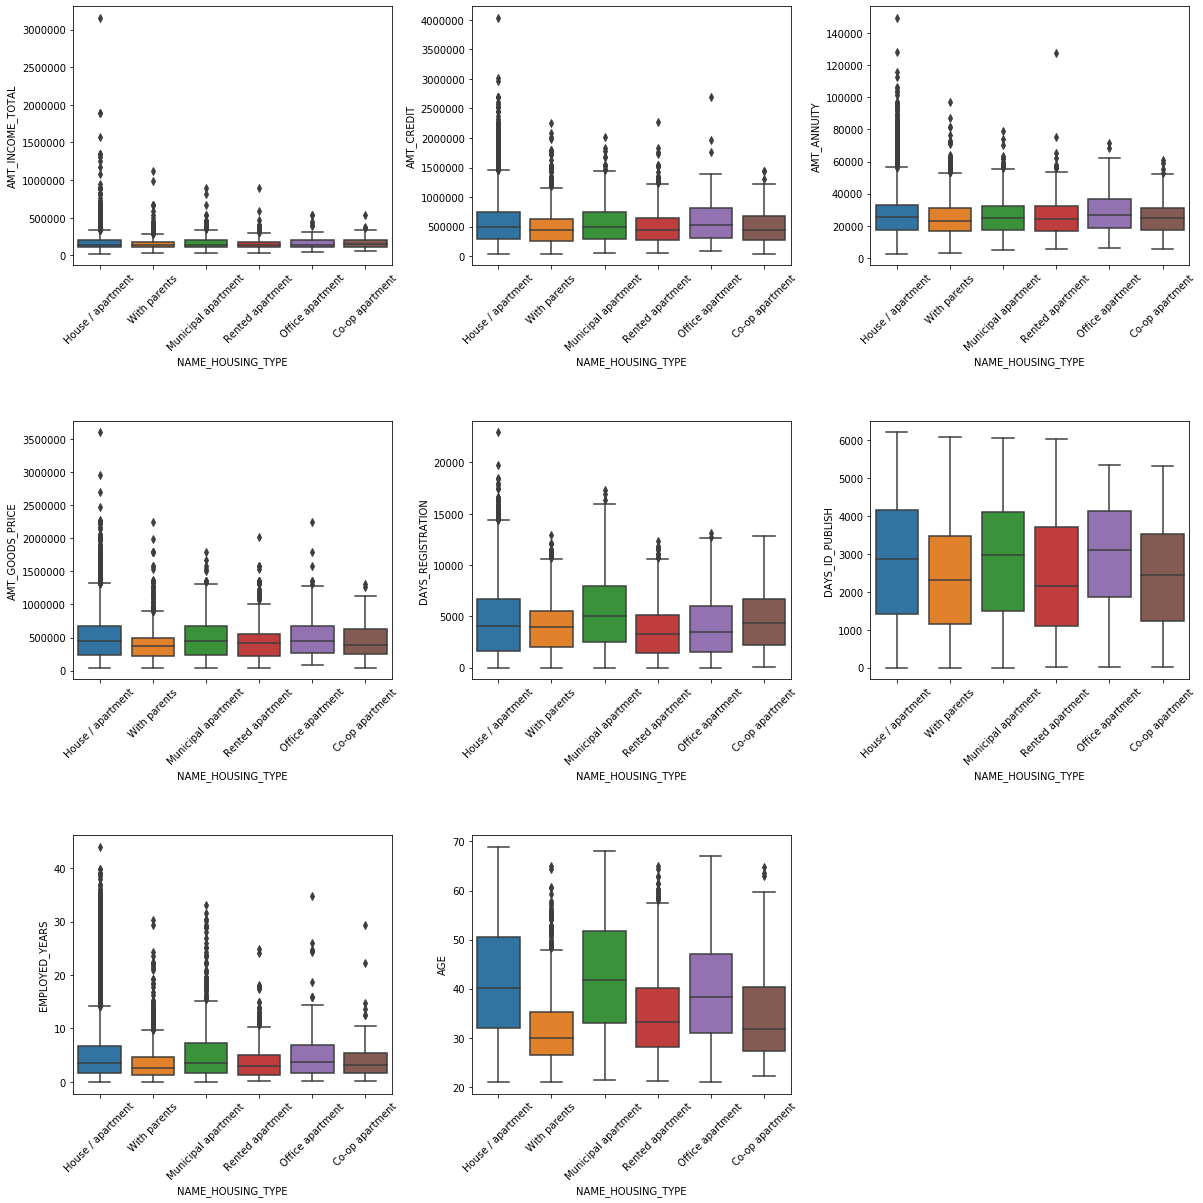

In [141]:
plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'NAME_HOUSING_TYPE', y = col, data = default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusion:** There does not seem to be any distinguishable relationships between housing types and the various other continuous variables like income, annuity etc.

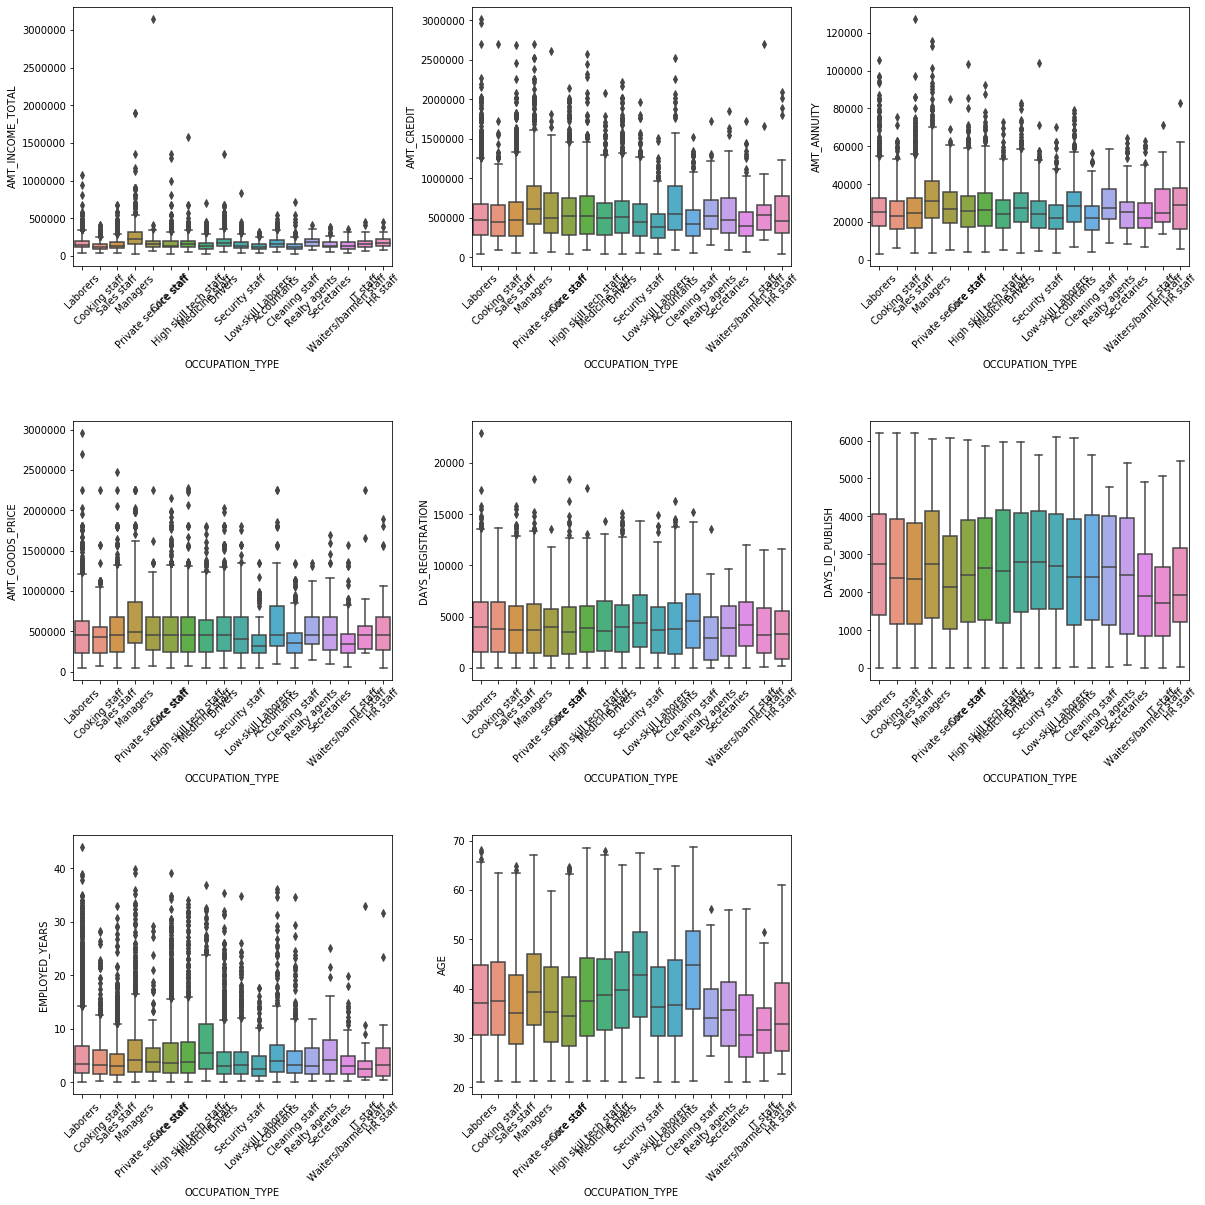

In [142]:

plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'OCCUPATION_TYPE', y = col, data = default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusions:**
1. Managers seem to have higher incomes in general
2. The credit amount taken by Managers and Low Skilled labourers seem to be similar amount. Similarly the goods price too.
3. Managers pay higher annuity too.
4. High skilled tech staff seem to have been employed the longest in the current org

#### 7.3.4 Continuous-Categorical Variables - For Non-Defaulters

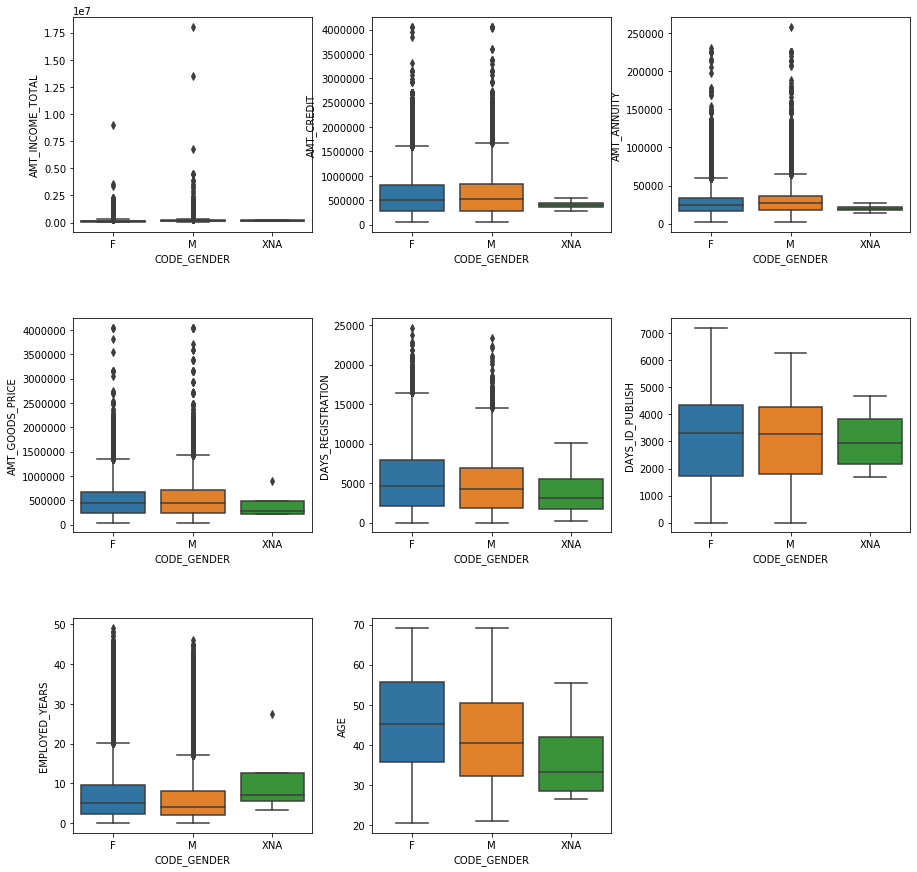

In [143]:
plt.figure(figsize=[15,15])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.40,wspace=0.25)
for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'CODE_GENDER', y = col, data = non_default_df)
    
plt.show()


**Conclusion:** There does not seem to be any differential corelation between Gender and other continuous variables

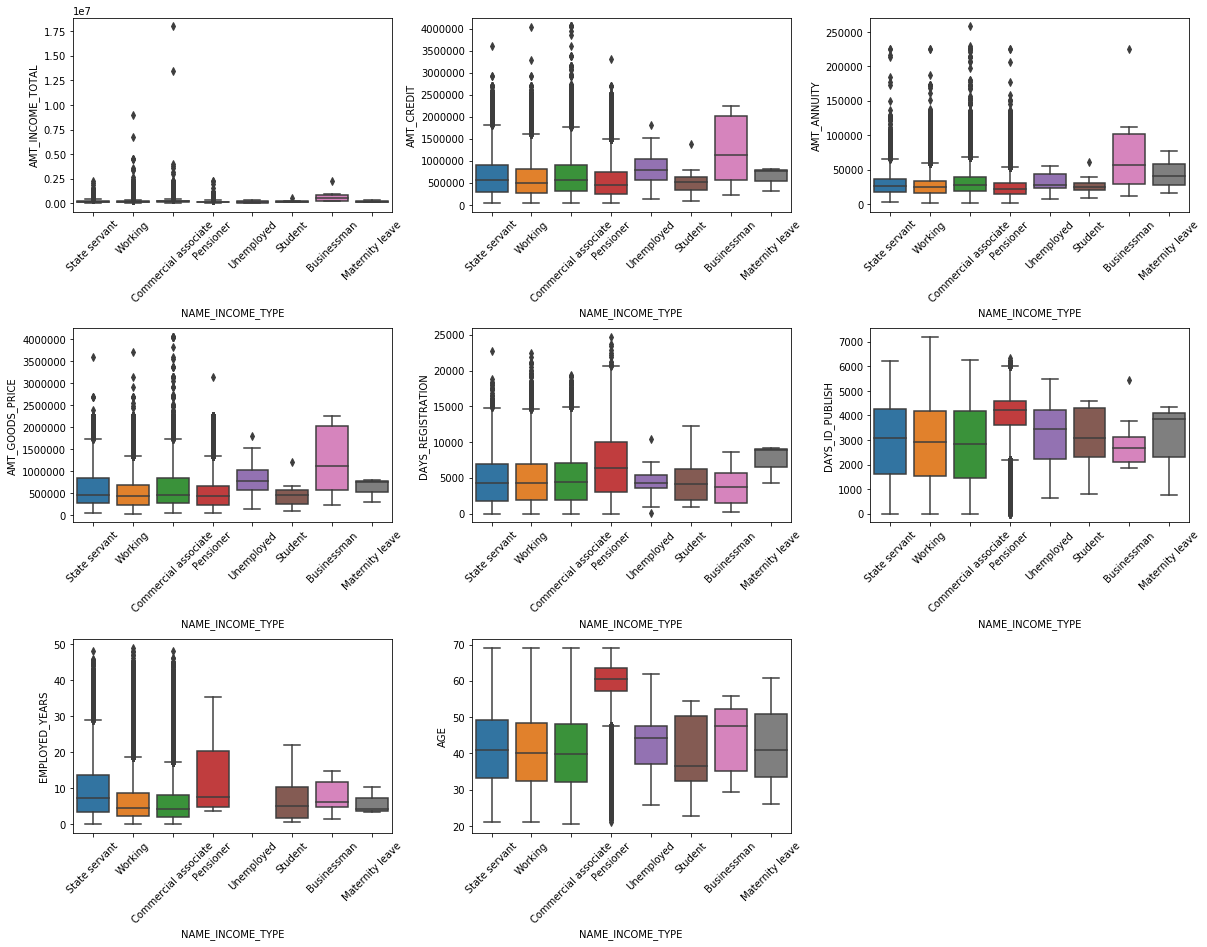

In [144]:
plt.figure(figsize=[20,15])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'NAME_INCOME_TYPE', y = col, data = non_default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusion:** It can be clearly noticed that business men are earning higher on an average and are also taking larger credits, buying more expensive goods and hence have a higher annuity

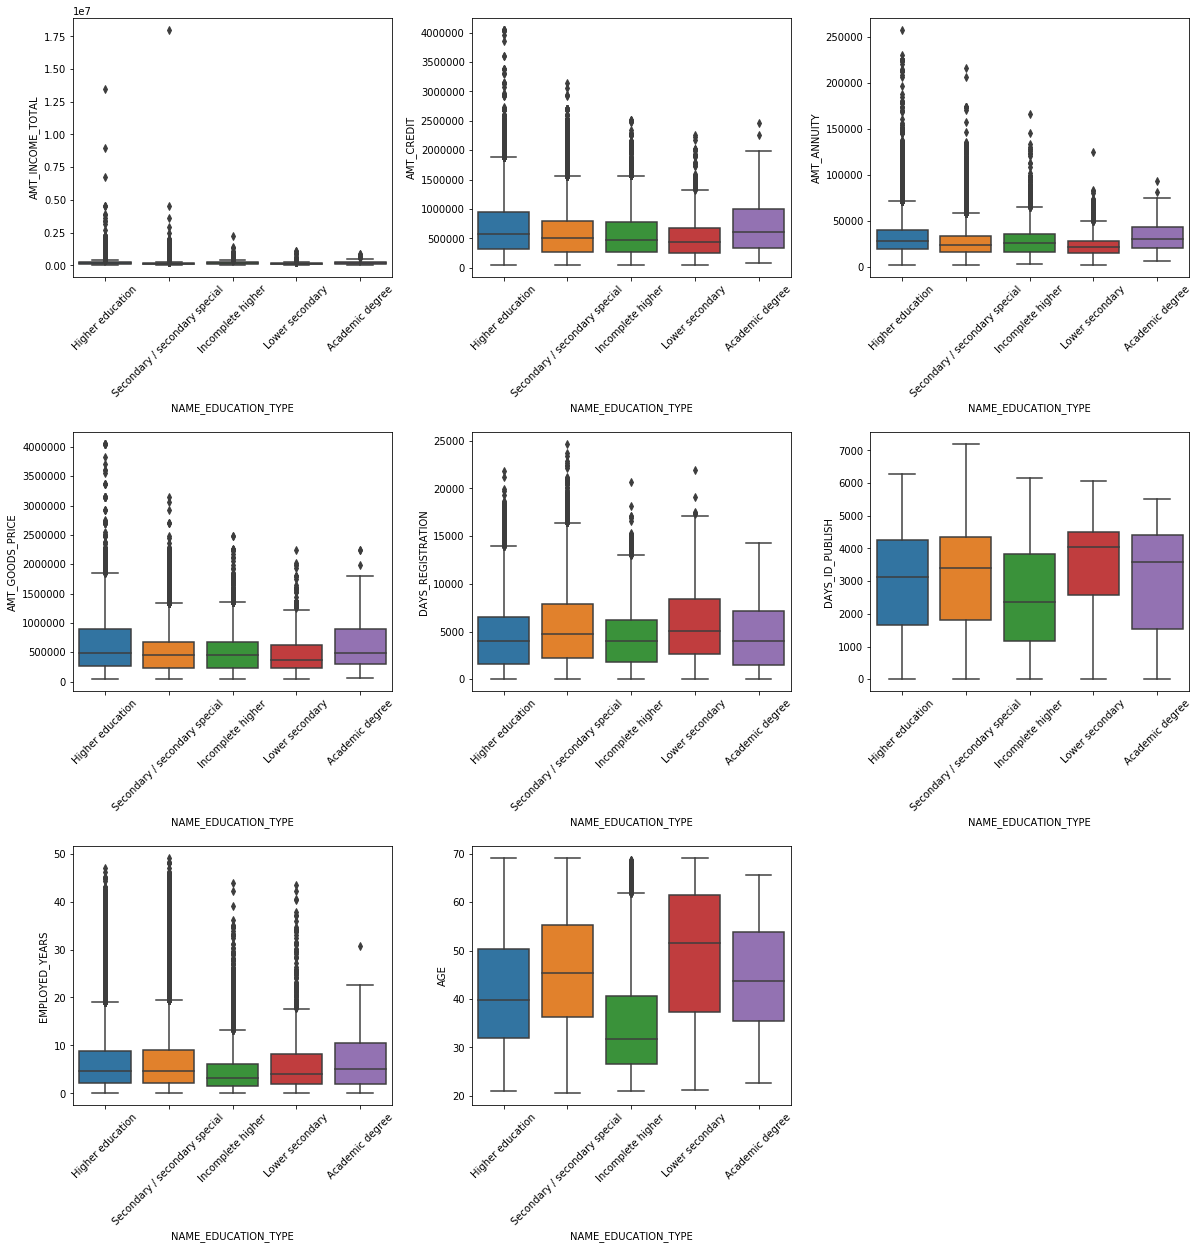

In [145]:
plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = col, data = non_default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusions:** 
1. It is very clear that those with higher education and Academic degree have similar behaviours w.r.t credit, goods price and annuity
2. Simmilary Secondary and lower secondary have similar behaviour

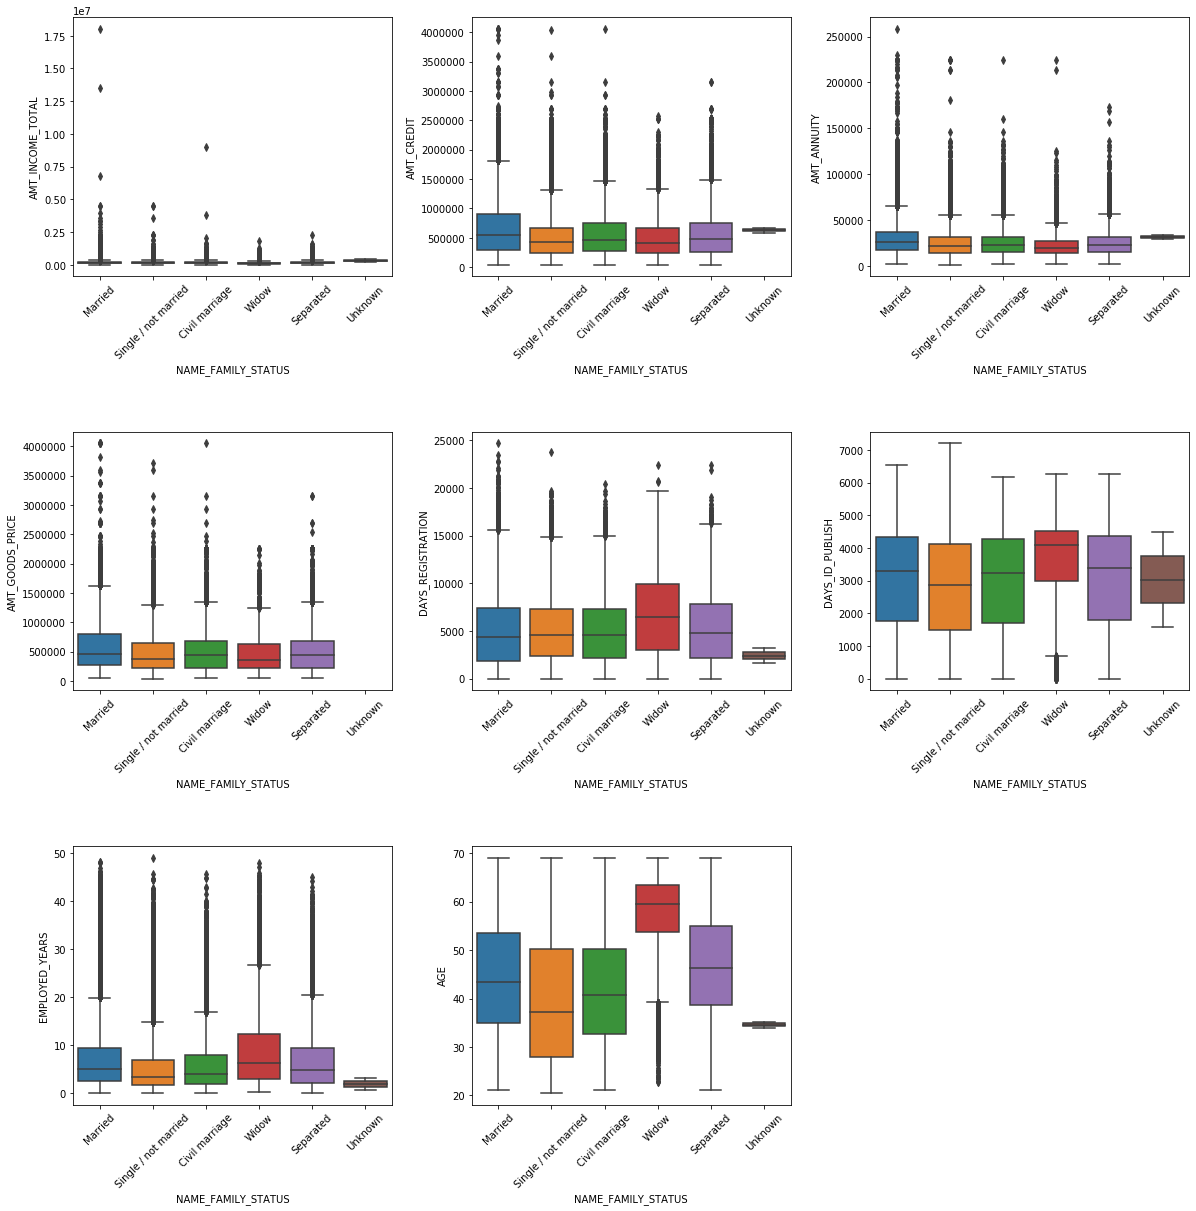

In [146]:
plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'NAME_FAMILY_STATUS', y = col, data = non_default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusions:**
1. Income does not have any relation with Family status.
2. Credit, goods price and Annuity seem to be slightly on the higher side for married people
3. The days since registration and days of id change seem to be higher for widows
4. As probably understandable, number of employed years and age also seem to be higher for Widows

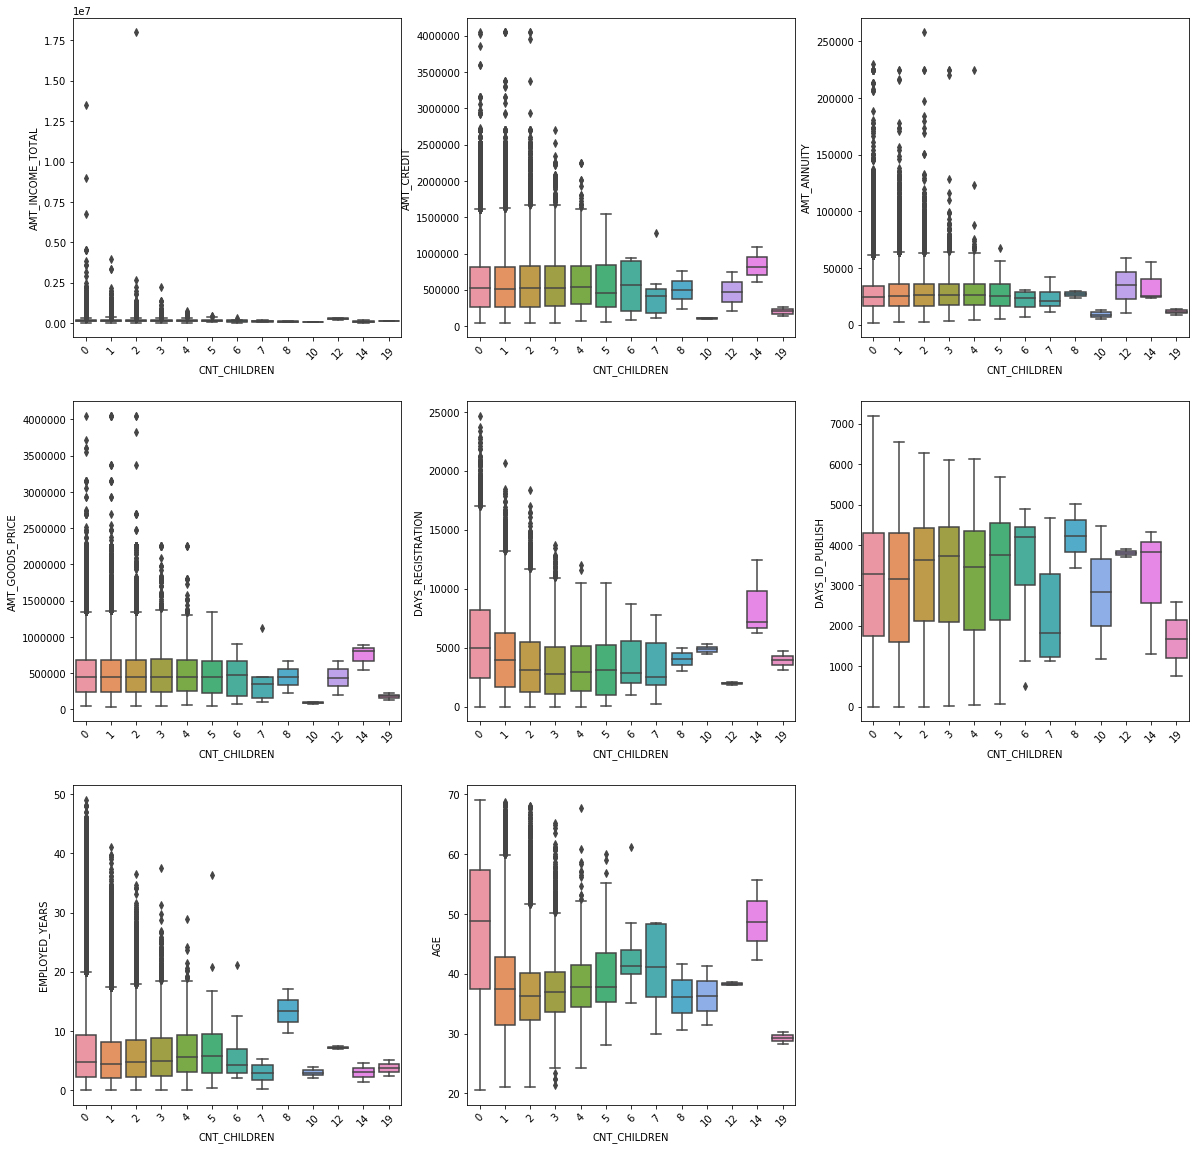

In [147]:
plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'CNT_CHILDREN', y = col, data = non_default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusions:**
1. People with 14 children are taking higher credits, higher annuity and higher goods price.

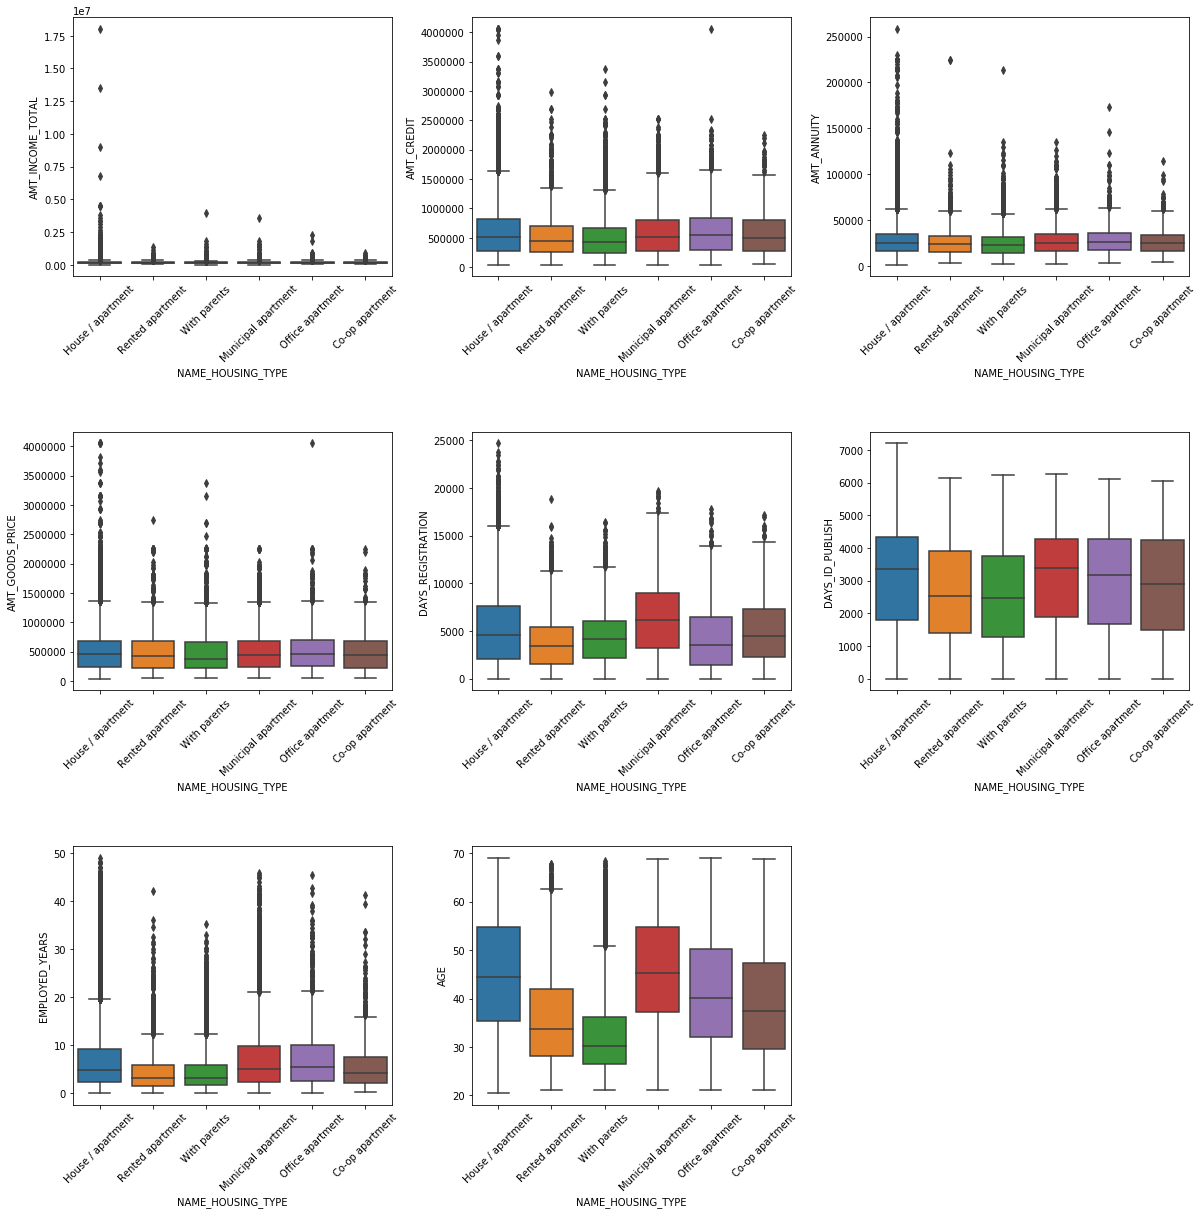

In [148]:
plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)

for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'NAME_HOUSING_TYPE', y = col, data = non_default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusion:** There does not seem to be any distinguishable relationships between housing types and the various other continuous variables like income, annuity etc.

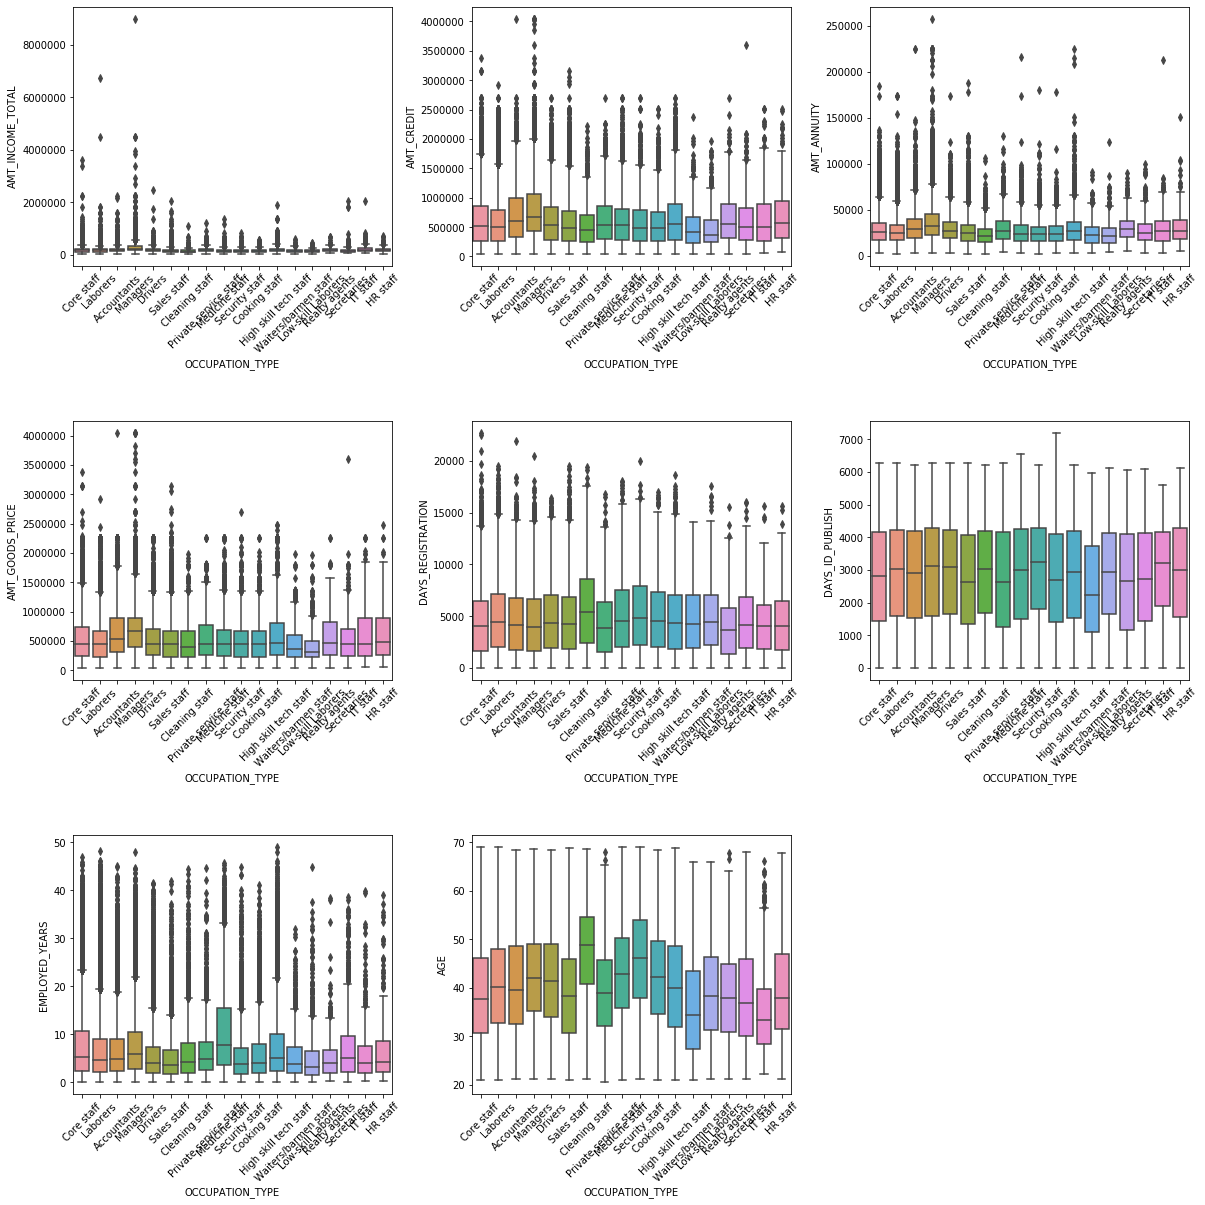

In [149]:

plt.figure(figsize=[20,20])
cont_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
            'EMPLOYED_YEARS','AGE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)
for i,col in enumerate(cont_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'OCCUPATION_TYPE', y = col, data = non_default_df)
    plt.xticks(rotation=45)

plt.show()

**Conclusions:**
Nothing much clear to conclude other than probably that accountants are slightly on the higher income side and hence all amounts are higher, compared to managers in defaulters. 

#### 7.3.5 Categorical-Categorical Variables 

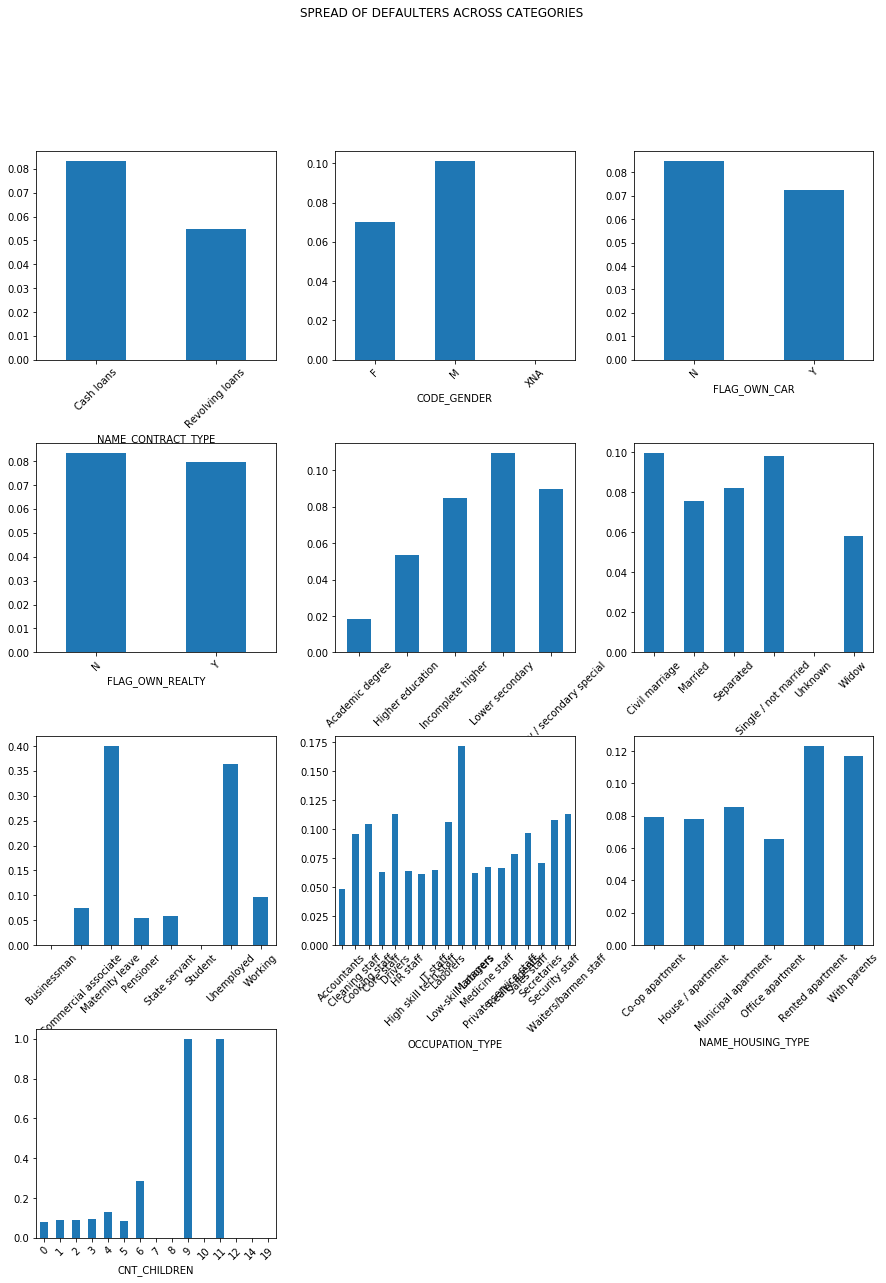

In [150]:
cat_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE',
            'NAME_FAMILY_STATUS','NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE',
            'CNT_CHILDREN']

plt.figure(figsize=[15,20])
plt.suptitle("SPREAD OF DEFAULTERS ACROSS CATEGORIES")
plt.subplots_adjust(hspace=0.40,wspace=0.25)
for i,col in enumerate(cat_cols):
    plt.subplot(4,3,i+1)
    loan_app.groupby(col)['TARGET'].mean().plot.bar()
    plt.xticks(rotation=45)

plt.show()


#### Conclusions:
The highest of defaults belong to the following category and hence need to be careful about lending to them:
1. Lower Secondary Educated
2. Commercial Associates
3. Labourers
4. People living in rented apartments or with parents
5. People having > 5 children

#### Categorical-Categorical Variables - For Defaulters

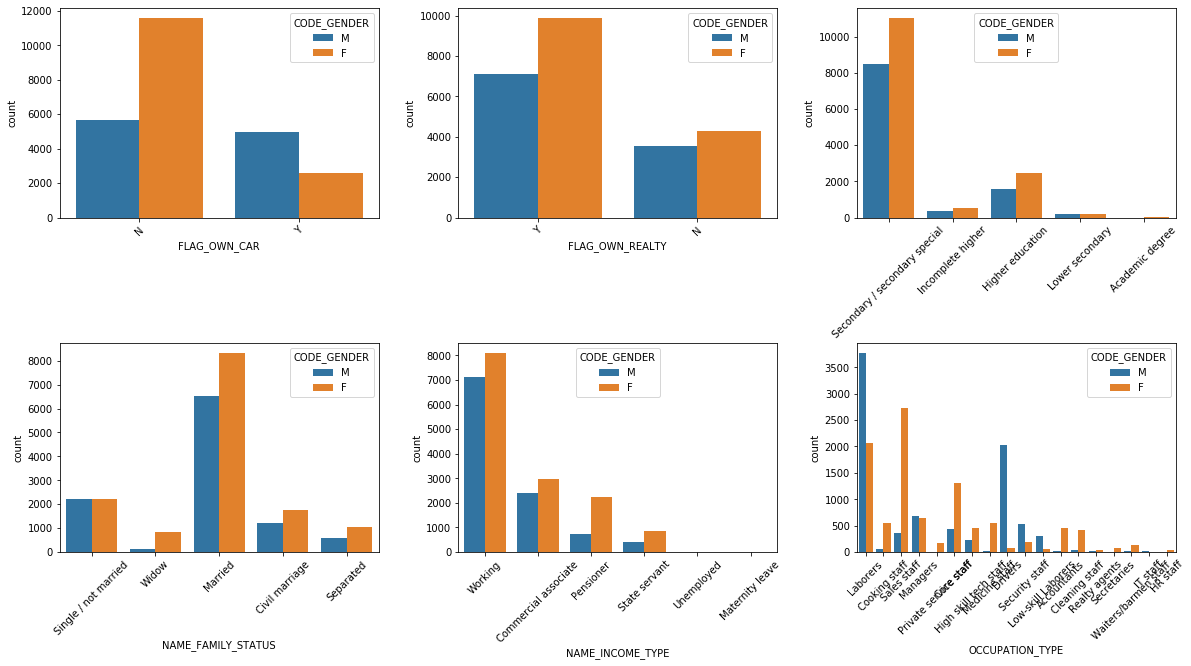

In [151]:
plt.figure(figsize=[20,10])
cat_cols = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE',
            'OCCUPATION_TYPE']
plt.subplots_adjust(hspace=0.60,wspace=0.25)

for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x = col, hue = 'CODE_GENDER', data = default_df)
    plt.xticks(rotation = 45)
    
    
plt.show()

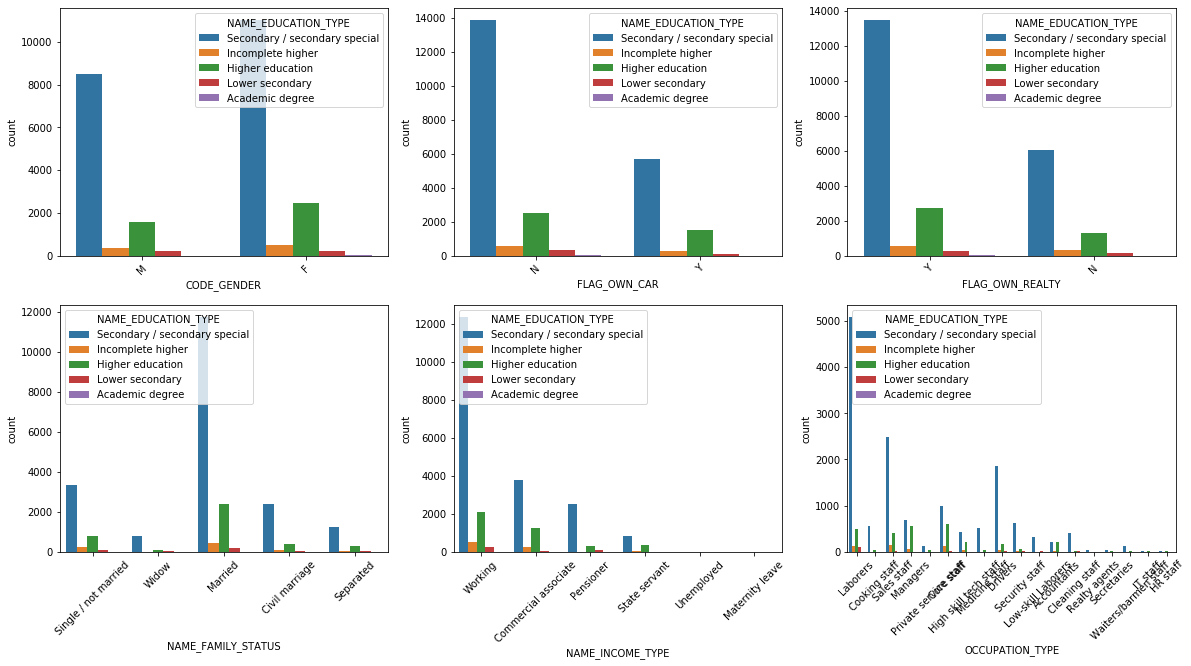

In [152]:
plt.figure(figsize=[20,10])
cat_cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','NAME_INCOME_TYPE',
            'OCCUPATION_TYPE']
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x = col, hue = 'NAME_EDUCATION_TYPE', data = default_df)
    plt.xticks(rotation = 45)
    
plt.show()

#### 7.3.6 Categorical-Categorical Variables - For Non-Defaulters

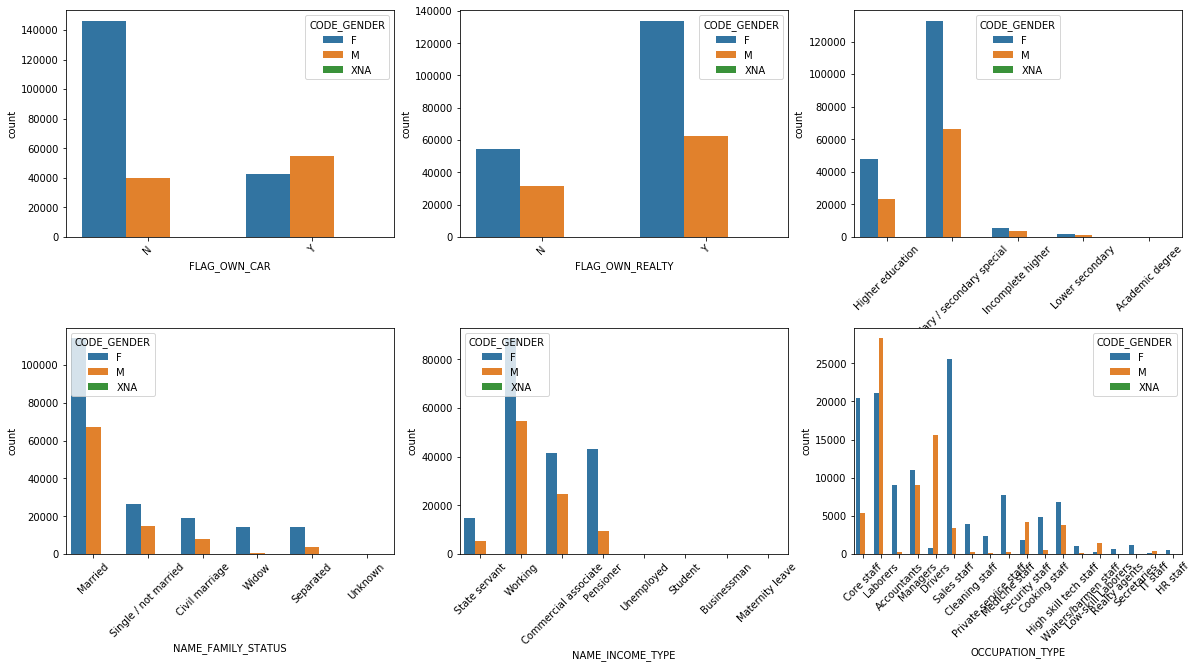

In [153]:
plt.figure(figsize=[20,10])
cat_cols = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE',
            'OCCUPATION_TYPE']
plt.subplots_adjust(hspace=0.40)

for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x = col, hue = 'CODE_GENDER', data = non_default_df)
    plt.xticks(rotation = 45)
    
    
plt.show()

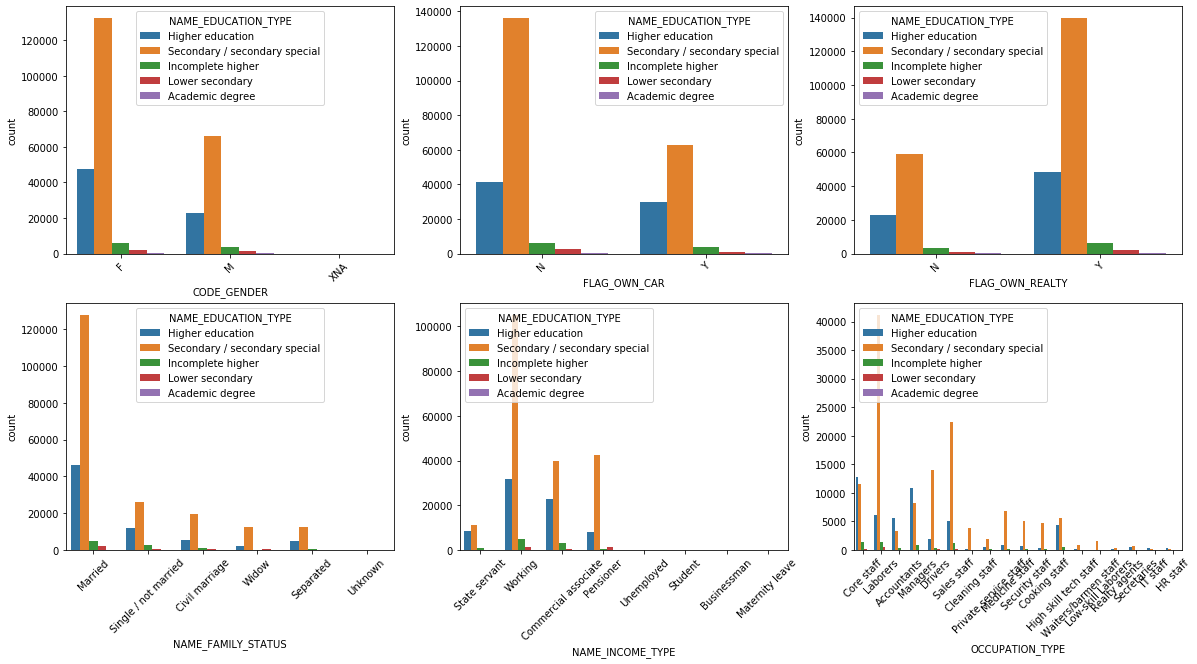

In [154]:
plt.figure(figsize=[20,10])
cat_cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','NAME_INCOME_TYPE',
            'OCCUPATION_TYPE']
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x = col, hue = 'NAME_EDUCATION_TYPE', data = non_default_df)
    plt.xticks(rotation = 45)
    
plt.show()

### Binned Income check

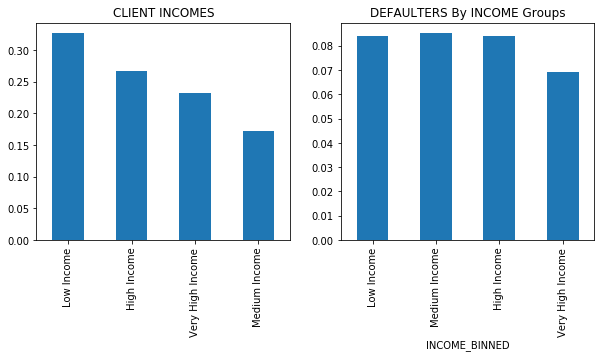

In [155]:
plt.figure(figsize= [10,4])
plt.subplot(1,2,1)
loan_app.INCOME_BINNED.value_counts(normalize=True).plot.bar()
plt.title('CLIENT INCOMES')
plt.subplot(1,2,2)
loan_app.groupby('INCOME_BINNED')['TARGET'].mean().plot.bar()
plt.title('DEFAULTERS By INCOME Groups')
plt.show()

**Conclusion:** Although Low income group are the largest requesters for loans, all income groups except "Very High income group" have alsmot equal number of defautlers

### Binned Age Check

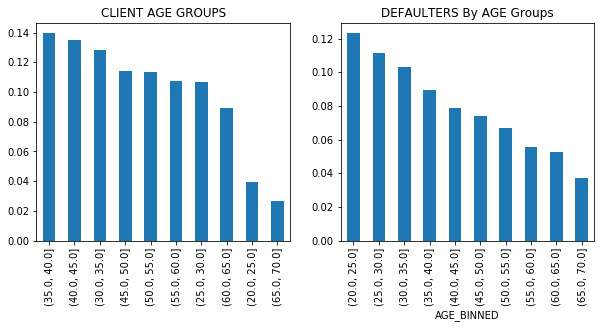

In [156]:
plt.figure(figsize= [10,4])
plt.subplot(1,2,1)
loan_app.AGE_BINNED.value_counts(normalize=True).plot.bar()
plt.title('CLIENT AGE GROUPS')
plt.subplot(1,2,2)
loan_app.groupby('AGE_BINNED')['TARGET'].mean().plot.bar()
plt.title('DEFAULTERS By AGE Groups')

plt.show()

**Conclusion:** Though the age group 20-25 are small number of applicants, a very large number default in this age group - a very risky age group.
NExt age group to be careful are the 25-30 range

## Step 8: Check Correlation between various variables and the target

In [157]:
loan_app.TARGET.mean()

0.08072908198107379

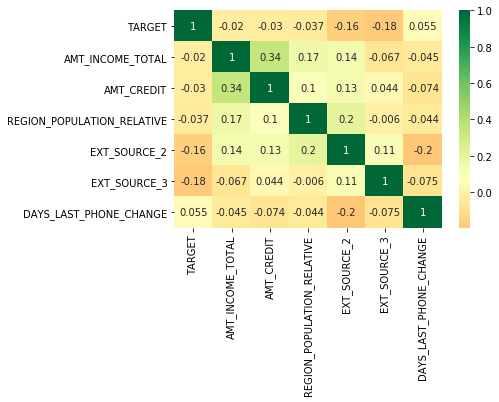

<Figure size 1800x1800 with 0 Axes>

In [158]:
res = loan_app[['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','REGION_POPULATION_RELATIVE','EXT_SOURCE_2',
                'EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']].corr()

sns.heatmap(res, annot=True,center=0.080,  cmap="RdYlGn")
plt.figure(figsize=[25,25])
plt.show()

In [159]:
correlations = loan_app.corr()['TARGET'].sort_values()

In [160]:
abs(correlations).sort_values(ascending = False).head(25)

TARGET                        1.000000
EXT_SOURCE_3                  0.178920
EXT_SOURCE_2                  0.160473
AGE                           0.078241
EMPLOYED_YEARS                0.074959
REGION_RATING_CLIENT_W_CITY   0.060895
DAYS_LAST_PHONE_CHANGE        0.055219
DAYS_ID_PUBLISH               0.051458
REG_CITY_NOT_WORK_CITY        0.050997
DAYS_REGISTRATION             0.041976
AMT_GOODS_PRICE               0.039646
REGION_POPULATION_RELATIVE    0.037227
DEF_30_CNT_SOCIAL_CIRCLE      0.032628
LIVE_CITY_NOT_WORK_CITY       0.032521
DEF_60_CNT_SOCIAL_CIRCLE      0.031565
AMT_CREDIT                    0.030370
AMT_INCOME_TOTAL              0.020428
AMT_REQ_CREDIT_BUREAU_YEAR    0.019931
CNT_CHILDREN                  0.019187
AMT_ANNUITY                   0.012818
AMT_REQ_CREDIT_BUREAU_MON     0.012462
OBS_30_CNT_SOCIAL_CIRCLE      0.009603
OBS_60_CNT_SOCIAL_CIRCLE      0.009488
CNT_FAM_MEMBERS               0.009307
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
Name: TARGET, dtype: floa

#### Conclusion for current application analysis:

The top 10 driver variables are:
1. EXT_SOURCE_3                   
2. EXT_SOURCE_2            
3. AGE                            
4. EMPLOYED_YEARS                 
5. REGION_RATING_CLIENT_W_CITY    
6. DAYS_LAST_PHONE_CHANGE         
7. DAYS_ID_PUBLISH                
8. REG_CITY_NOT_WORK_CITY         
9. DAYS_REGISTRATION              
10. AMT_GOODS_PRICE                

In [161]:
# Highly negatively correlated variables
correlations.head(7)

EXT_SOURCE_3        -0.178920
EXT_SOURCE_2        -0.160473
AGE                 -0.078241
EMPLOYED_YEARS      -0.074959
DAYS_ID_PUBLISH     -0.051458
DAYS_REGISTRATION   -0.041976
AMT_GOODS_PRICE     -0.039646
Name: TARGET, dtype: float64

This implies that the higher the score from the external source 3 and 2, the higher the age, the higher the number of years in employment at the current office or longer the days since an ID change was made, longer since registration, or largers the goods price, the lesser the chances of defaulting

In [162]:
# Highly negatively correlated variables
correlations.tail(6)

LIVE_CITY_NOT_WORK_CITY       0.032521
DEF_30_CNT_SOCIAL_CIRCLE      0.032628
REG_CITY_NOT_WORK_CITY        0.050997
DAYS_LAST_PHONE_CHANGE        0.055219
REGION_RATING_CLIENT_W_CITY   0.060895
TARGET                        1.000000
Name: TARGET, dtype: float64

This implies that if the person is not living in the work city or his registration city is not work city or if the region rating is low or the he has recently changes his phone, there is a higher chance of defaulting

## Step 9: Join with the Previous Application details

In [163]:
prev_plus_loan = pd.merge(loan_app,prev_app, how='inner', on='SK_ID_CURR', suffixes=('_curr', '_prev'))

In [164]:
prev_plus_loan.shape

(1413698, 79)

In [165]:
prev_plus_loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_curr', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_curr', 'AMT_ANNUITY_curr', 'AMT_GOODS_PRICE_curr',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'INCOME_BINNED', 'ANNUITY_BINNED',
       'GOODS_PRICE_B

In [166]:
# drop the unnecessary columns
prev_plus_loan.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                    'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY',
                    'NAME_CASH_LOAN_PURPOSE','NAME_TYPE_SUITE','SELLERPLACE_AREA'], axis=1, inplace=True)

In [167]:
prev_plus_loan.shape

(1413698, 69)

In [168]:
prev_plus_loan.loc[prev_plus_loan['DAYS_TERMINATION'] == 365243.0,"DAYS_TERMINATION"] = np.NaN

In [169]:
prev_plus_loan.loc[prev_plus_loan['DAYS_FIRST_DRAWING'] == 365243.0,"DAYS_FIRST_DRAWING"] = np.NaN

In [170]:
prev_plus_loan.loc[prev_plus_loan['DAYS_FIRST_DUE'] == 365243.0,"DAYS_FIRST_DUE"] = np.NaN

In [171]:
prev_plus_loan.loc[prev_plus_loan['DAYS_LAST_DUE_1ST_VERSION'] == 365243.0,"DAYS_LAST_DUE_1ST_VERSION"] = np.NaN

In [172]:
prev_plus_loan.loc[prev_plus_loan['DAYS_LAST_DUE'] == 365243.0,"DAYS_LAST_DUE"] = np.NaN

In [173]:
prev_plus_loan['DAYS_DECISION'] = prev_plus_loan['DAYS_DECISION']*-1
prev_plus_loan['DAYS_FIRST_DRAWING'] = prev_plus_loan['DAYS_FIRST_DRAWING']*-1
prev_plus_loan['DAYS_FIRST_DUE'] = prev_plus_loan['DAYS_FIRST_DUE']*-1
prev_plus_loan['DAYS_LAST_DUE'] = prev_plus_loan['DAYS_LAST_DUE']*-1
prev_plus_loan['DAYS_TERMINATION'] = prev_plus_loan['DAYS_TERMINATION']*-1

In [174]:
prev_plus_loan.sort_values(by="SK_ID_CURR").head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_curr CODE_GENDER FLAG_OWN_CAR  \
0      100002       1              Cash loans           M            N   
1      100003       0              Cash loans           F            N   
2      100003       0              Cash loans           F            N   
3      100003       0              Cash loans           F            N   
4      100004       0         Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_curr  \
0               Y             0     202500.000000    406597.500000   
1               N             0     270000.000000   1293502.500000   
2               N             0     270000.000000   1293502.500000   
3               N             0     270000.000000   1293502.500000   
4               Y             0      67500.000000    135000.000000   

   AMT_ANNUITY_curr  AMT_GOODS_PRICE_curr NAME_INCOME_TYPE  \
0      24700.500000         351000.000000          Working   
1      35698.500000        1129500.000000    State servant   
2      35698.500000        1129500.000000    State servant   
3      35698.500000        1129500.000000    State servant   
4       6750.000000         135000.000000          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0                    0.018801               3648             2120   
1                    0.003541               1186              291   
2                    0.003541               1186              291   
3                    0.003541               1186              291   
4                    0.010032               4260             2531   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
0        Laborers         1.000000                            2   
1      Core staff         2.000000                            1   
2      Core staff         2.000000                            1   
3      Core staff         2.000000                            1   
4        Laborers         1.000000                            2   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Government   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                  2.000000   
1      0.622246           nan                  1.000000   
2      0.622246           nan                  1.000000   
3      0.622246           nan                  1.000000   
4      0.555912      0.729567                  0.000000   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                  2.000000                  2.000000   
1                  0.000000                  1.000000   
2                  0.000000                  1.000000   
3                  0.000000                  1.000000   
4                  0.000000                  0.000000   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                  2.000000            -1134.000000   
1                  0.000000             -828.000000   
2                  0.000000             -828.000000   
3                  0.000000             -828.000000   
4                  0.000000             -

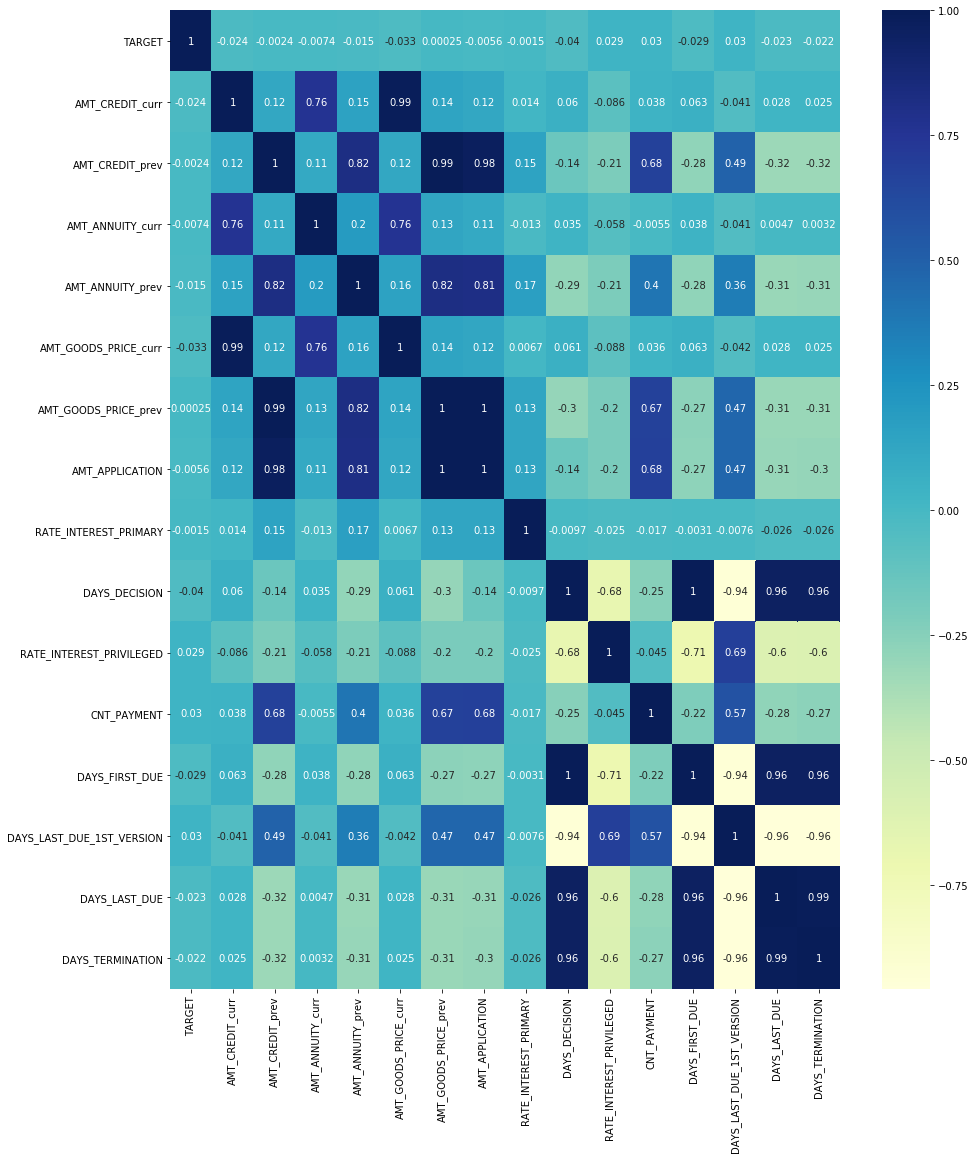

In [175]:
plt.figure(figsize=[15,18])
corr_matrix = prev_plus_loan[['TARGET','AMT_CREDIT_curr','AMT_CREDIT_prev','AMT_ANNUITY_curr','AMT_ANNUITY_prev',
                              'AMT_GOODS_PRICE_curr','AMT_GOODS_PRICE_prev','AMT_APPLICATION','RATE_INTEREST_PRIMARY',
                              'DAYS_DECISION','RATE_INTEREST_PRIVILEGED','CNT_PAYMENT','DAYS_FIRST_DUE',
                             'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']].corr()
sns.heatmap(corr_matrix, annot=True,cmap='YlGnBu' )
plt.show()

There is no strong correlation betwen target and any of the previous application numerical varaibles
i.e. the defaulter is not directly predictable from the amounts of loan taken earlier, or the number of days of payment already done

### Univariate Analysis

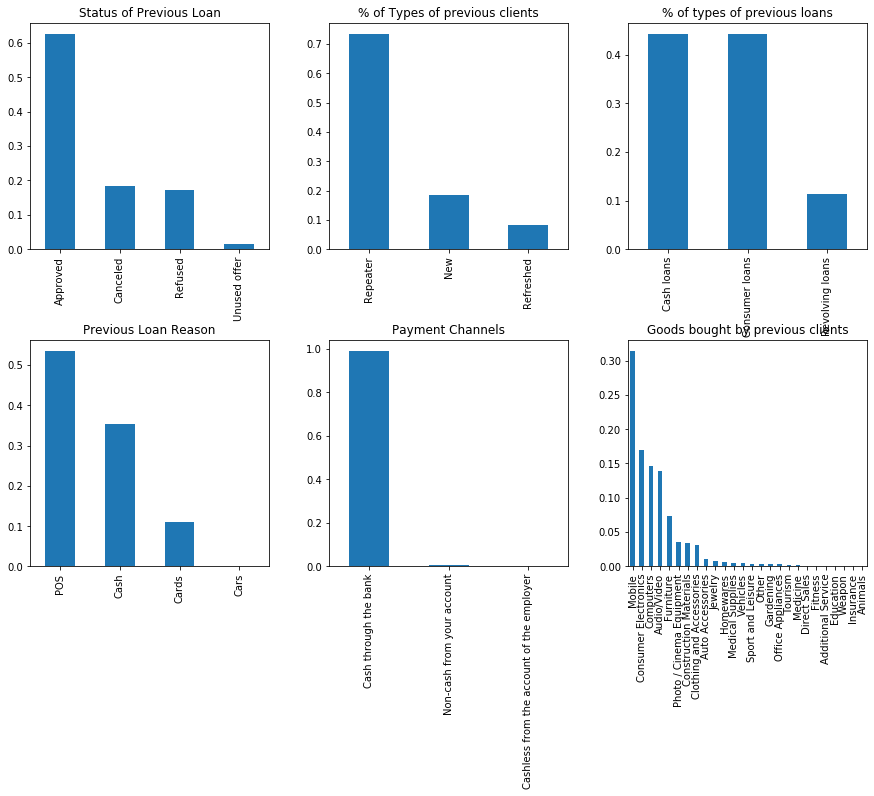

In [176]:
plt.figure(figsize=[15,10])
plt.subplots_adjust(hspace=0.40,wspace=0.25)
plt.subplot(2,3,1)
prev_plus_loan[~(prev_plus_loan['NAME_CONTRACT_STATUS'] == 'XNA')].NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.title("Status of Previous Loan")
plt.subplot(2,3,2)
prev_plus_loan[~(prev_plus_loan['NAME_CLIENT_TYPE'] == 'XNA')].NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar()
plt.title("% of Types of previous clients")
plt.subplot(2,3,3)
prev_plus_loan[~(prev_plus_loan['NAME_CONTRACT_TYPE_prev'] == 'XNA')].NAME_CONTRACT_TYPE_prev.value_counts(normalize=True).plot.bar()
plt.title("% of types of previous loans")
plt.subplot(2,3,4)
prev_plus_loan[~(prev_plus_loan['NAME_PORTFOLIO'] == 'XNA')].NAME_PORTFOLIO.value_counts(normalize=True).plot.bar()
plt.title("Previous Loan Reason")
plt.subplot(2,3,5)
prev_plus_loan[~(prev_plus_loan['NAME_PAYMENT_TYPE'] == 'XNA')].NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Payment Channels")
plt.subplot(2,3,6)
prev_plus_loan[~(prev_plus_loan['NAME_GOODS_CATEGORY'] == 'XNA')].NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.bar()
plt.title("Goods bought by previous clients")
plt.show()

#### Obsevations:
1. More than 60% of current loan applications have been approved earlier, with 20% each being either refused or cancelled
2. More than 70% are repeating clients, close to 20% are new and about 10% are refreshed
3. Previous loans were mostly cash loans (45%), consumer loans(45%) and only 10% were revolving loans
4. Most of the previous types of loans were of the type POCC
5. Most of the previous loans had a payment channel as "Cash through the bank"
6. The largest goods bought by previous loans were mobiles - 30%

### Bivariate Analysis

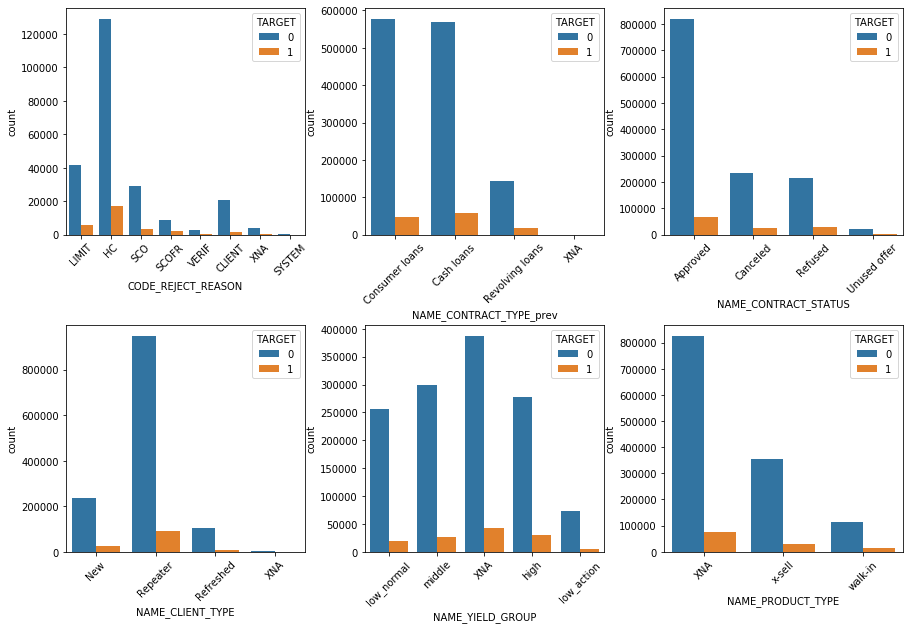

In [177]:
cat_cols = ['CODE_REJECT_REASON','NAME_CONTRACT_TYPE_prev','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE',
            'NAME_YIELD_GROUP','NAME_PRODUCT_TYPE']
plt.figure(figsize=[15,10])
plt.subplots_adjust(hspace=0.40,wspace=0.25)

for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x =col , hue = 'TARGET', data = prev_plus_loan[~(prev_plus_loan[col] == 'XAP')])
    plt.xticks(rotation = 45)
plt.show()

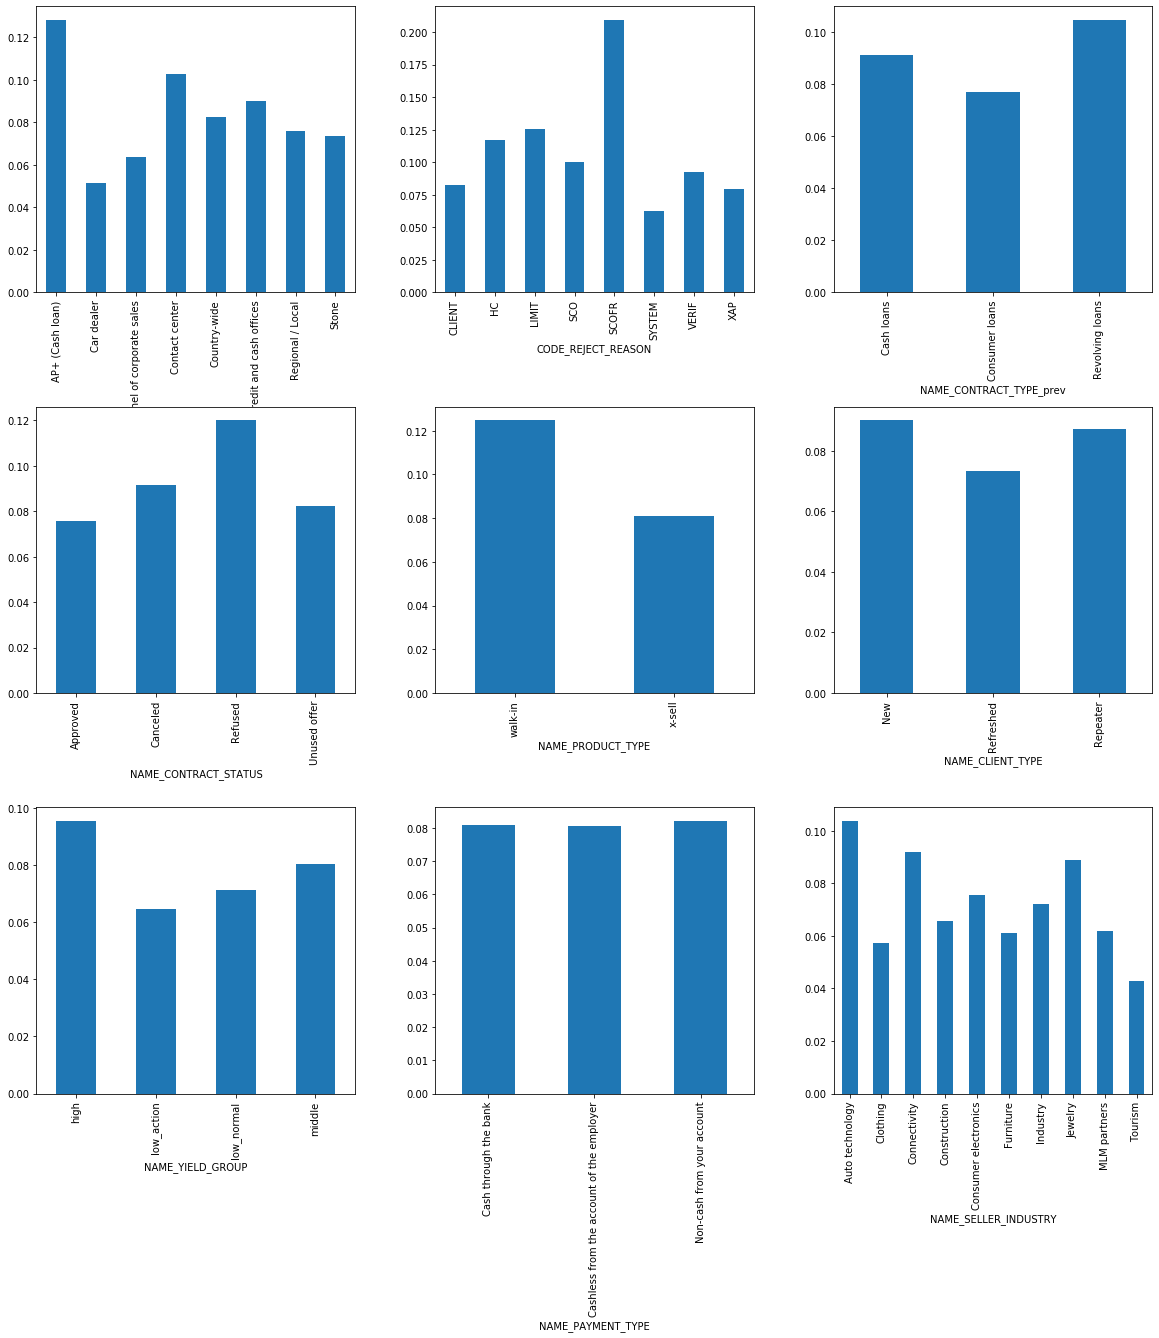

In [178]:
cat_cols = ['CHANNEL_TYPE','CODE_REJECT_REASON','NAME_CONTRACT_TYPE_prev','NAME_CONTRACT_STATUS','NAME_PRODUCT_TYPE',
            'NAME_CLIENT_TYPE', 'NAME_YIELD_GROUP','NAME_PAYMENT_TYPE','NAME_SELLER_INDUSTRY']
plt.figure(figsize=[20,20])
plt.subplots_adjust(hspace=0.40,wspace=0.25)

for i,col in enumerate(cat_cols):
    plt.subplot(3,3,i+1)
    prev_plus_loan[~(prev_plus_loan == 'XNA')].groupby(col)['TARGET'].mean().plot.bar()
plt.show()

#### Conclusions:
1. Clients from AP+ (Cash loan) channel are high defaulters
2. SCOFR reject reason in previous application - are highest defaulters
3. Apart from no-data available, Revolving loans previous seem to be slightly high on defaults
4. Previously "Refused" applicants are highest on default
5. All types of payment have an equal amount of defautlers
6. No of new applicants seem to default more than repeaters or refreshed clients
7. People with highest yield are the highest defaulters
8. Walk-in customers default more
9. Loans sold by Auto-technology are defaulted more

***
# Recommendations
***
## Safe to give to

- The 30-45 age group
- Recommended by external sources 2 and 3
- Higher income group
- More loyal employees (longer duration at current employment)
- Clients with the number of enquiries with credit bureau in the past year around 1
- loans being given through car dealers
- Clients with previously unused offers as well as previously approved loans
- Clients whose previous loan was a cross-sell

## Riskier to give to

- Low income category (<25000)
- Age group < 30 years
- More recent ID change
- More recent registration
- Client with registered city being different from work city. Or work city being different from living city
- Loans given through the AP + Cash loan channel. Reduce exposure here
- Previously refused clients
- Walk-in loans are also a bit risky. Need to assess more stringently
- The high-yield group
- auto-technology or connectivity
